# Maestría en Analítica de Datos
## Proyecto Final Machine Learning 2025-10

### ETL y EDA

In [3]:
# Importar librerías necesarias
from datasets import load_dataset
import pandas as pd

# Cargar el dataset desde Huggin Face
dataset = load_dataset("akshatmehta98/amazon_reviews")

# Mostrando estructura del dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 303316
    })
    test: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 116661
    })
})

In [4]:
# Convertimos a DataFrame para visualizar mejor
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()  

# Veamos las primeras filas del train
df_train.head(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,text,labels,sentiment_code,input_ids,attention_mask
0,0,0,Great find!,these candies are very hard to find in the sin...,positive,2,[ 0 6097 831 34204 621 4552 7...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,0,0,very tasty - and healthy,im on the healthy nutrition and fitness kick t...,positive,2,[ 0 566 98 70 87349 150017 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,0,0,I liked the old man design better :),i dont normally add content to amazon because ...,positive,2,[ 0 17 13319 3638 538 15190 10...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
3,0,0,Good gluten free cookie!,good tasting cookie will satisfy your sweet to...,positive,2,[ 0 4127 3251 1916 9332 1221 40407 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
4,88,95,Organic but BPA in the lid!,our baby really loves to eat these and they co...,negative,0,[ 0 2446 15546 6183 5161 7 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
5,0,0,a must for gin and tonic,i once tried q tonic for my gin and tonic now ...,positive,2,[ 0 17 24145 37842 8096 47 6...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
6,1,2,Delicious!,glad i ordered these they are really yummy i g...,positive,2,[ 0 9525 17 12989 297 6097 1...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
7,0,0,Great tasting tea at best price,my family is big on tea drinking and cant sett...,positive,2,[ 0 759 14449 83 6957 98 26...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
8,6,9,Tasted bad. Tossed most in the trash,i lived in the islands for 5 years and i know ...,negative,0,[ 0 17 158930 23 70 90695 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
9,0,0,Awesome service and great products,we sent this product as a gift to my husbands ...,positive,2,[ 0 642 9325 903 12996 237 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...


In [5]:
#Revisión general del train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303316 entries, 0 to 303315
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    303316 non-null  int64 
 1   HelpfulnessDenominator  303316 non-null  int64 
 2   Summary                 303316 non-null  object
 3   text                    303316 non-null  object
 4   labels                  303316 non-null  object
 5   sentiment_code          303316 non-null  int64 
 6   input_ids               303316 non-null  object
 7   attention_mask          303316 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.5+ MB


In [6]:
df_train.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,sentiment_code
count,303316.000000,303316.000000,303316.000000
mean,1.844644,2.815661,0.929773
std,6.636582,7.804405,0.833000
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000
max,844.000000,923.000000,2.000000


In [7]:
# Distribución de la variable Objetivo en el train
df_train["labels"].value_counts(normalize=True)

negative    0.384523
positive    0.314296
neutral     0.301181
Name: labels, dtype: float64

In [8]:
# Calculemos la longitud de las reseñas en PALABRAS
df_train["length_words"] = df_train["text"].apply(lambda x: len(str(x).split()))

# Calculemos la longitud de las reseñas en CARACTERES
df_train["length_chars"] = df_train["text"].apply(lambda x: len(str(x)))

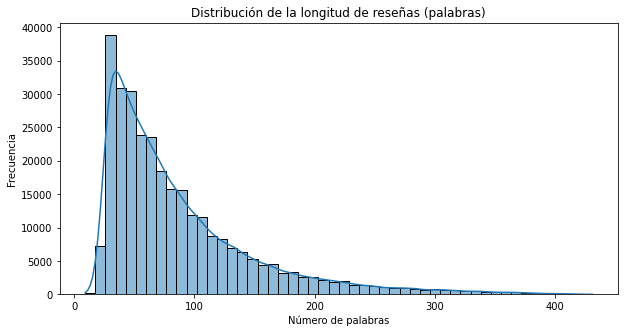

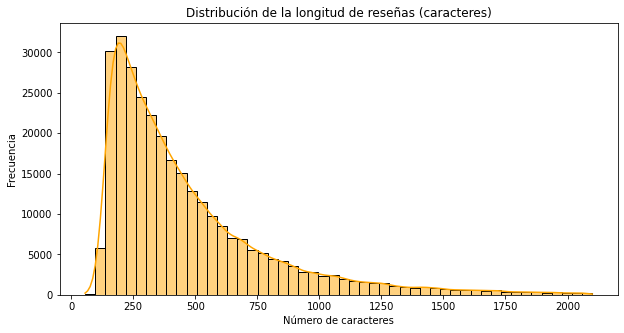

In [9]:
# Librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de longitud en palabras
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_words'], bins=50, kde=True)
plt.title('Distribución de la longitud de reseñas (palabras)')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de longitud en caracteres
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_chars'], bins=50, kde=True, color='orange')
plt.title('Distribución de la longitud de reseñas (caracteres)')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

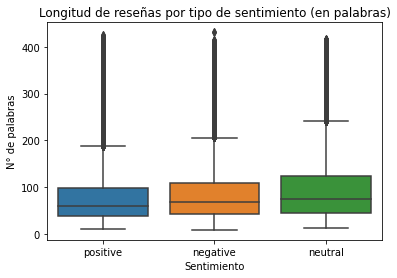

In [10]:
# Relacionamos longitud con el sentimiento
sns.boxplot(data=df_train, x='labels', y='length_words')
plt.title('Longitud de reseñas por tipo de sentimiento (en palabras)')
plt.xlabel('Sentimiento')
plt.ylabel('N° de palabras')
plt.show()

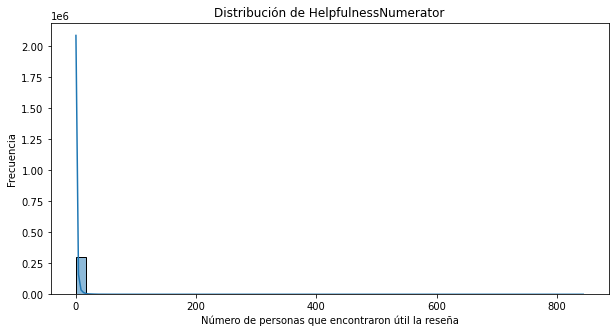

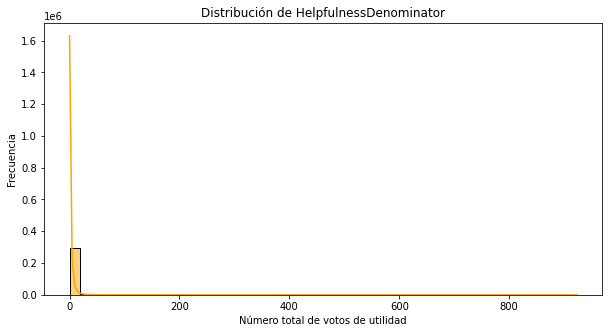

In [11]:
# Distribución de las variables HelpfulnessNumerator y HelpfulnessDenominator

# HelpfulnessNumerator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessNumerator'], bins=50, kde=True)
plt.title('Distribución de HelpfulnessNumerator')
plt.xlabel('Número de personas que encontraron útil la reseña')
plt.ylabel('Frecuencia')
plt.show()

# HelpfulnessDenominator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessDenominator'], bins=50, kde=True, color='orange')
plt.title('Distribución de HelpfulnessDenominator')
plt.xlabel('Número total de votos de utilidad')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
# Agregamos una columna de ratio de utilidad
# Esto normaliza un poco el análisis
df_train['helpfulness_ratio'] = df_train['HelpfulnessNumerator'] / (df_train['HelpfulnessDenominator'] + 1)

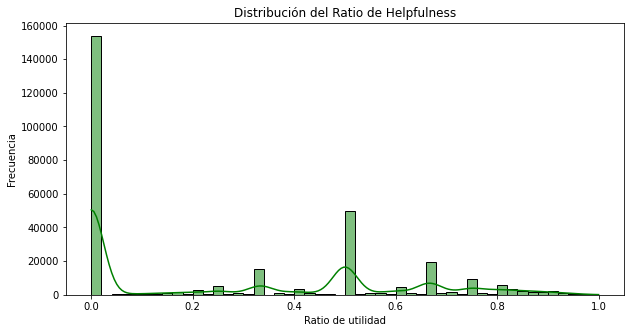

In [13]:
#Visualizamos la distribución del ratio de utilidad
plt.figure(figsize=(10,5))
sns.histplot(df_train['helpfulness_ratio'], bins=50, kde=True, color='green')
plt.title('Distribución del Ratio de Helpfulness')
plt.xlabel('Ratio de utilidad')
plt.ylabel('Frecuencia')
plt.show()

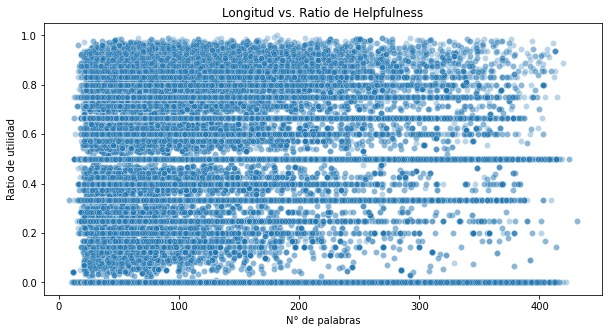

In [14]:
# Veamos una posible relación entre longitud y utilidad
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_train, x='length_words', y='helpfulness_ratio', alpha=0.3)
plt.title('Longitud vs. Ratio de Helpfulness')
plt.xlabel('N° de palabras')
plt.ylabel('Ratio de utilidad')
plt.show()

In [15]:
# Vamos a limpiar el texto para una visualización
# Para empezar, importaremos las librerías necesarias
import nltk
import re
import string

# Descargar stopwords 
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dponzon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Realizaremos una función para limpiar el texto
def limpiar_texto(texto):
    # Pasar a minúsculas
    texto = texto.lower()
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    # Eliminar puntuación
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    texto = " ".join([word for word in texto.split() if word not in stop_words])
    return texto

In [17]:
# Creamos una nueva columna en el DataFrame con el texto limpio (Solo para visualización)
df_train['clean_text'] = df_train['text'].apply(limpiar_texto)

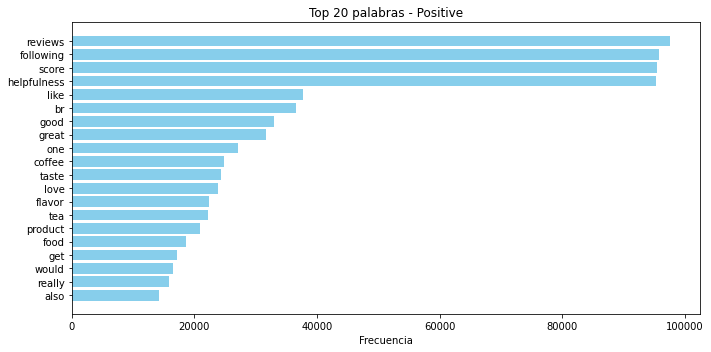

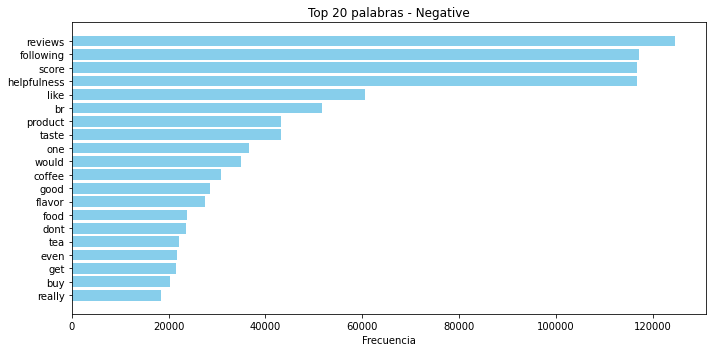

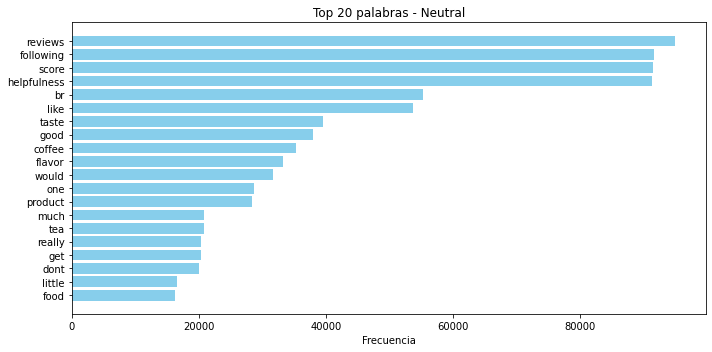

In [18]:
# Con el texto limpio, vamos a visualizar las palabras más frecuentes por clase
from collections import Counter
import matplotlib.pyplot as plt

def top_palabras_por_clase(df, clase, n=20):
    subset = df[df['labels'] == clase]
    texto = " ".join(subset['clean_text'].dropna())
    palabras = texto.split()
    top = Counter(palabras).most_common(n)

    palabras, freqs = zip(*top)
    plt.figure(figsize=(10, 5))
    plt.barh(palabras[::-1], freqs[::-1], color='skyblue')
    plt.title(f'Top {n} palabras - {clase.capitalize()}')
    plt.xlabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for clase in ['positive', 'negative', 'neutral']:
    top_palabras_por_clase(df_train, clase)

In [19]:
# Vamos a calcular TF-IDF para visualizar la importancia de las palabras por clase
#libreria necesaria
from sklearn.feature_extraction.text import TfidfVectorizer

# Agrupar el texto por clase
textos_por_clase = df_train.groupby("labels")["clean_text"].apply(lambda x: " ".join(x.dropna()))

# Creamos el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Aplicamos a los textos agrupados por clase
tfidf_matrix = vectorizer.fit_transform(textos_por_clase)

# Obtenemos nombres de las palabras
palabras = vectorizer.get_feature_names_out()

# Creamos un DataFrame TF-IDF con clases como índice y palabras como columnas
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), index=textos_por_clase.index, columns=palabras)

In [20]:
# Creamos una función para visualizar el top de palabras por clase
def mostrar_top_tfidf(clase, top_n=20):
    serie = df_tfidf.loc[clase].sort_values(ascending=False)[:top_n]
    plt.figure(figsize=(10,5))
    plt.barh(serie.index[::-1], serie.values[::-1], color='tomato')
    plt.title(f'Top {top_n} palabras con mayor TF-IDF en clase: {clase}')
    plt.xlabel('Peso TF-IDF')
    plt.tight_layout()
    plt.show()

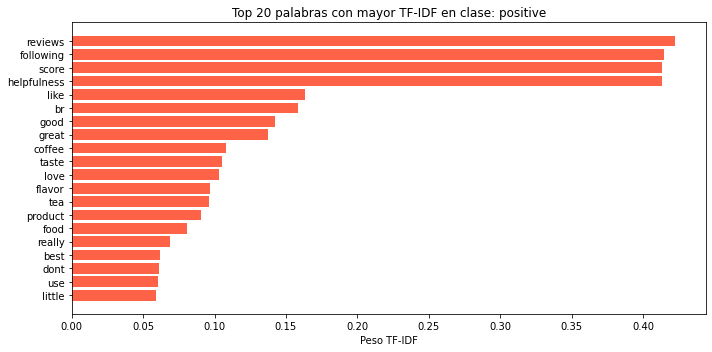

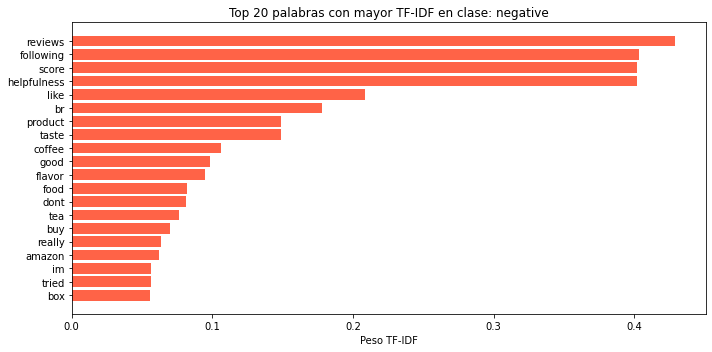

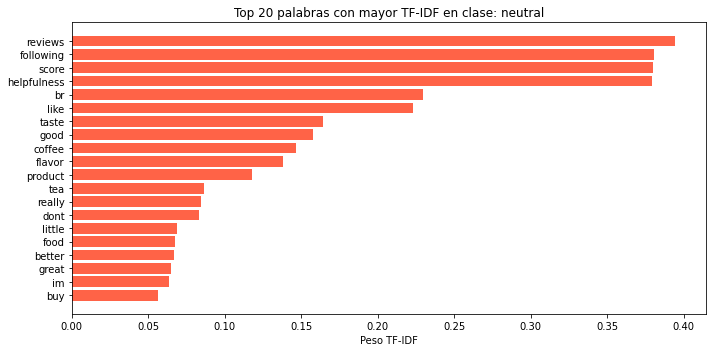

In [21]:
# Mostramos el top de palabras por clase
for clase in ['positive', 'negative', 'neutral']:
    mostrar_top_tfidf(clase)

In [22]:
# Distribución de la variable Objetivo en el test
df_test["labels"].value_counts(normalize=True)

negative    0.386659
positive    0.314115
neutral     0.299226
Name: labels, dtype: float64

In [23]:
# Sacamos los datos de validación de los datos de ntrenamiento
from sklearn.model_selection import train_test_split

# Dividir df_train en train y valid (80/20)
df_train_split, df_valid = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['sentiment_code'])

print("Train split:", df_train_split.shape)
print("Valid split:", df_valid.shape)

Train split: (242652, 12)
Valid split: (60664, 12)


### Tokenización y Embeddings

In [24]:
# Verificamos que el equipo (MAC) este usando la GPU
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"Dispositivo seleccionado: {device}")

Dispositivo seleccionado: cpu


In [ ]:
import os
os.environ["USE_TF"] = "0"
# Usaremos un modelo preentrenado basado en transformers para generar los embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2',device=device) # Este modelo tokeniza y genera el embedding

In [ ]:
# Generar embeddings
X_train = model.encode(df_train_split['text'].tolist(), show_progress_bar=True)
X_valid = model.encode(df_valid['text'].tolist(), show_progress_bar=True)
X_test  = model.encode(df_test['text'].tolist(),  show_progress_bar=True)

# Etiquetas
y_train = df_train_split['sentiment_code'].values
y_valid = df_valid['sentiment_code'].values
y_test  = df_test['sentiment_code'].values

# Confirmar formas
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test: ", X_test.shape)

In [ ]:
# Guardamos los embeddings y etiquetas en archivos .npy
import numpy as np

# Guardar embeddings
np.save("X_train_embeddings.npy", X_train)
np.save("X_valid_embeddings.npy", X_valid)
np.save("X_test_embeddings.npy", X_test)

# Guardar etiquetas
np.save("y_train.npy", y_train)
np.save("y_valid.npy", y_valid)
np.save("y_test.npy", y_test)

print("Archivos guardados correctamente.")

In [1]:
# Para cargar los embeddings y etiquetas en otro script, usar:
import numpy as np
X_train = np.load("X_train_embeddings.npy")
X_valid = np.load("X_valid_embeddings.npy")
X_test  = np.load("X_test_embeddings.npy")

y_train = np.load("y_train.npy")
y_valid = np.load("y_valid.npy")
y_test  = np.load("y_test.npy")

### Modelos Benchmark

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:

# Definir el modelo KNN con k=5 
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.6993


In [ ]:
knn10 = KNeighborsClassifier(n_neighbors=10)

# Entrenar el modelo
knn10.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn10.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.6784


In [ ]:
accuracy_val = []
best_accuracy = 1.0

for k in range(20):
    k = k+1
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if (accuracy < best_accuracy):
        best_accuracy = accuracy
        best_k = k
    accuracy_val.append(accuracy)
    print('accuracy value for k= ' , k , 'is:', accuracy)

print(f"Best accuracy: {best_accuracy}, Best k: {best_k}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  1 is: 0.7952271967495564


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  2 is: 0.7508421837632113


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  3 is: 0.7276982024841206


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  4 is: 0.7008340405105391


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  5 is: 0.69927396473543


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  6 is: 0.6925622101644937


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  7 is: 0.6940537111802574


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  8 is: 0.6864419128929119


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  9 is: 0.6839046467971301


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy value for k=  10 is: 0.6784186660494939


KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=1)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=1)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.7968


In [ ]:
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=1)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(weights='uniform',n_neighbors=1)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=1)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=1,metric='euclidean')

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=1,metric='euclidean',algorithm='ball_tree')

# Entrenar el modelo
# Medir tiempo de entrenamiento
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.4f} segundos")

# Hacer predicciones en el conjunto de prueba
# Medir tiempo de predicción
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
print(f"Tiempo de predicción: {end_time - start_time:.4f} segundos")

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

Tiempo de entrenamiento: 6.7809 segundos
Tiempo de predicción: 25950.0375 segundos
✅ Precisión del modelo KNN: 0.7952


In [ ]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=1,metric='euclidean')

# Entrenar el modelo
# Medir tiempo de entrenamiento
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.4f} segundos")

# Hacer predicciones en el conjunto de prueba
# Medir tiempo de predicción
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
print(f"Tiempo de predicción: {end_time - start_time:.4f} segundos")

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo KNN: {accuracy:.4f}")

Tiempo de entrenamiento: 0.0937 segundos
Tiempo de predicción: 612.9529 segundos
✅ Precisión del modelo KNN: 0.7952


In [ ]:
import joblib

# Guardar el modelo KNN
joblib.dump(knn, "modelo_knn.pkl")

# Cargar el modelo KNN
modelo_cargado = joblib.load("modelo_knn.pkl")

# Verificar que se cargó correctamente
print(modelo_cargado)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Medir tiempo de entrenamiento
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.4f} segundos")

# Medir tiempo de predicción
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
print(f"Tiempo de predicción: {end_time - start_time:.4f} segundos")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     45108
           1       0.63      0.68      0.65     34908
           2       0.75      0.67      0.71     36645

    accuracy                           0.70    116661
   macro avg       0.70      0.70      0.70    116661
weighted avg       0.70      0.70      0.70    116661

✅ Accuracy: 0.6993


In [ ]:
# Liberías necesarias para evaluar el modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

In [ ]:
# Predecir probabilidades
y_train_pred = knn.predict(X_train)
y_valid_pred = knn.predict(X_valid)
y_test_pred  = knn.predict(X_test)

# Si y_train_pred, y_valid_pred, y_test_pred son etiquetas (1D):
y_train_pred_labels = y_train_pred  # No se necesita argmax
y_valid_pred_labels = y_valid_pred
y_test_pred_labels = y_test_pred

# Función para imprimir solo las métricas importantes
def evaluar(y_true, y_pred, y_proba, nombre="Conjunto"):
    print(f"\n📊 Resultados - {nombre}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")
    
    try:
        auc = roc_auc_score(y_true, y_proba, multi_class='ovr')
        print(f"AUC       : {auc:.4f}")
    except:
        print("AUC       : ⚠️ No se pudo calcular")
    
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

# Aplicar a cada conjunto
evaluar(y_train, y_train_pred_labels, y_train_pred, "Entrenamiento")
evaluar(y_valid, y_valid_pred_labels, y_valid_pred, "Validación")
evaluar(y_test,  y_test_pred_labels,  y_test_pred,  "Testing")


📊 Resultados - Entrenamiento
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-score  : 1.0000
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[93304     1     0]
 [    2 73080     0]
 [    0     6 76259]]

📊 Resultados - Validación
Accuracy  : 0.8849
Precision : 0.8863
Recall    : 0.8849
F1-score  : 0.8834
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[21998   575   754]
 [  595 16880   796]
 [ 1961  2301 14804]]

📊 Resultados - Testing
Accuracy  : 0.7952
Precision : 0.8022
Recall    : 0.7952
F1-score  : 0.7935
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[32018  5852  7238]
 [ 1221 32140  1547]
 [ 3837  4194 28614]]


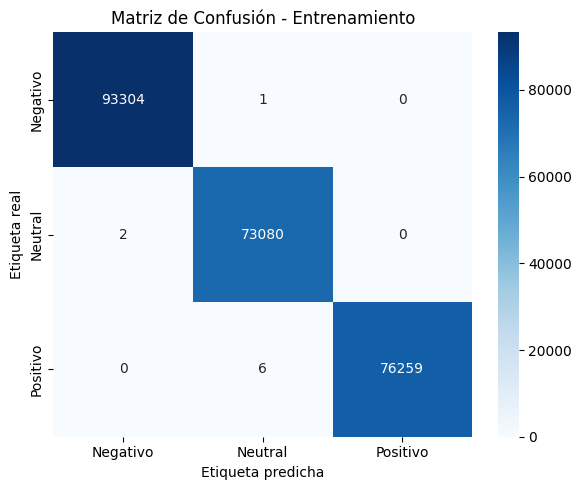

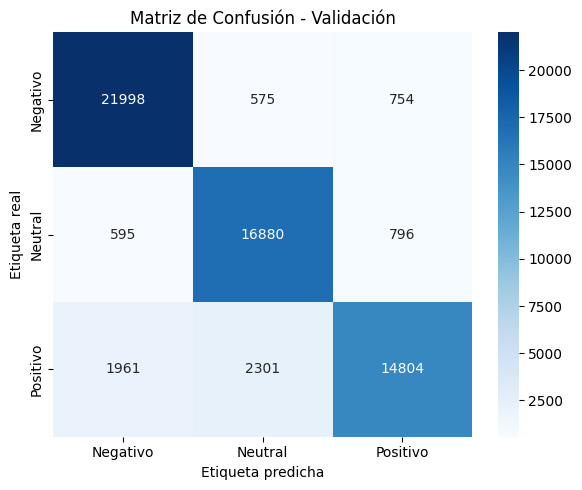

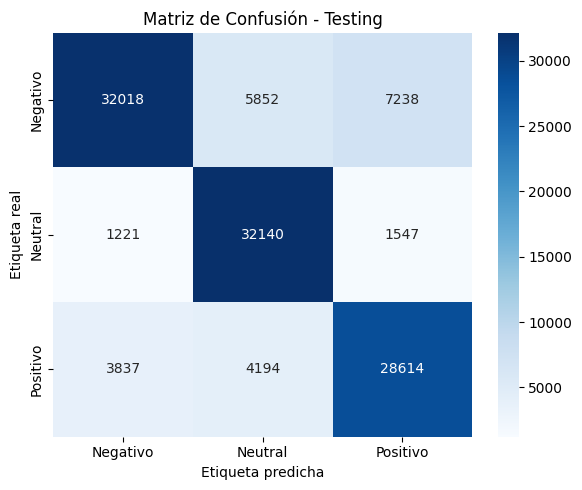

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Generar y guardar las matrices de confusión
plot_conf_matrix(y_train, y_train_pred_labels, "Matriz de Confusión - Entrenamiento", "conf_matrix_train_knn.png")
plot_conf_matrix(y_valid, y_valid_pred_labels, "Matriz de Confusión - Validación", "conf_matrix_valid_knn.png")
plot_conf_matrix(y_test, y_test_pred_labels, "Matriz de Confusión - Testing", "conf_matrix_test_knn.png")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejor número de vecinos: {grid_search.best_params_['n_neighbors']}")

/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

KeyboardInterrupt: 

#### Naive Bayes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Liberías necesarias para evaluar el modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definir y entrenar el modelo Naive Bayes
nb = GaussianNB()
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.4f} segundos")

# Predicción y evaluación
start_time = time.time()
y_pred = nb.predict(X_test)
end_time = time.time()
print(f"Tiempo de predicción: {end_time - start_time:.4f} segundos")

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo Naive Bayes: {accuracy:.4f}")

Tiempo de entrenamiento: 2.3067 segundos
Tiempo de predicción: 1.8647 segundos
✅ Precisión del modelo Naive Bayes: 0.5887


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np

# Inicializar modelo Naive Bayes
nb = GaussianNB()

# Definir la grilla de hiperparámetros
param_grid = {"var_smoothing": np.logspace(-9, -3, 10)}

# Configurar GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

# Entrenar el modelo usando la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_nb = GaussianNB(var_smoothing=grid_search.best_params_["var_smoothing"])
g_nb = best_nb



Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:

# Entrenar con `partial_fit()` en lotes
batch_size = 1000
start_time = time.time()
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    best_nb.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

end_time = time.time()
print(f"Tiempo de entrenamiento optimizado: {end_time - start_time:.4f} segundos")
# Evaluar el modelo
accuracy = best_nb.score(X_test, y_test)

# Resultados
print(f"✅ Mejor configuración: {grid_search.best_params_}")
print(f"🔹 Mejor precisión en validación: {grid_search.best_score_:.4f}")
print(f"📌 Precisión final con `partial_fit()`: {accuracy:.4f}")

Tiempo de entrenamiento optimizado: 0.9026 segundos
✅ Mejor configuración: {'var_smoothing': 1e-09}
🔹 Mejor precisión en validación: 0.5915
📌 Precisión final con `partial_fit()`: 0.5888


In [ ]:
import joblib

# Guardar el modelo KNN
joblib.dump(best_nb, "modelo_NaiveBayes.pkl")

# Cargar el modelo KNN
nb = joblib.load("modelo_NaiveBayes.pkl")

# Verificar que se cargó correctamente
print(nb)

GaussianNB()


In [ ]:
# Predecir probabilidades
y_train_pred = nb.predict(X_train)
y_valid_pred = nb.predict(X_valid)
y_test_pred  = nb.predict(X_test)

# Si y_train_pred, y_valid_pred, y_test_pred son etiquetas (1D):
y_train_pred_labels = y_train_pred  # No se necesita argmax
y_valid_pred_labels = y_valid_pred
y_test_pred_labels = y_test_pred

# Función para imprimir solo las métricas importantes
def evaluar(y_true, y_pred, y_proba, nombre="Conjunto"):
    print(f"\n📊 Resultados - {nombre}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")
    
    try:
        auc = roc_auc_score(y_true, y_proba, multi_class='ovr')
        print(f"AUC       : {auc:.4f}")
    except:
        print("AUC       : ⚠️ No se pudo calcular")
    
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

# Aplicar a cada conjunto
evaluar(y_train, y_train_pred_labels, y_train_pred, "Entrenamiento")
evaluar(y_valid, y_valid_pred_labels, y_valid_pred, "Validación")
evaluar(y_test,  y_test_pred_labels,  y_test_pred,  "Testing")


📊 Resultados - Entrenamiento
Accuracy  : 0.5919
Precision : 0.5939
Recall    : 0.5919
F1-score  : 0.5928
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[59033 25765  8507]
 [22034 34464 16584]
 [10802 15338 50125]]

📊 Resultados - Validación
Accuracy  : 0.5901
Precision : 0.5926
Recall    : 0.5901
F1-score  : 0.5913
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[14761  6509  2057]
 [ 5504  8604  4163]
 [ 2723  3909 12434]]

📊 Resultados - Testing
Accuracy  : 0.5888
Precision : 0.5905
Recall    : 0.5888
F1-score  : 0.5896
AUC       : ⚠️ No se pudo calcular
Matriz de confusión:
[[28514 12416  4178]
 [10610 16167  8131]
 [ 5294  7347 24004]]


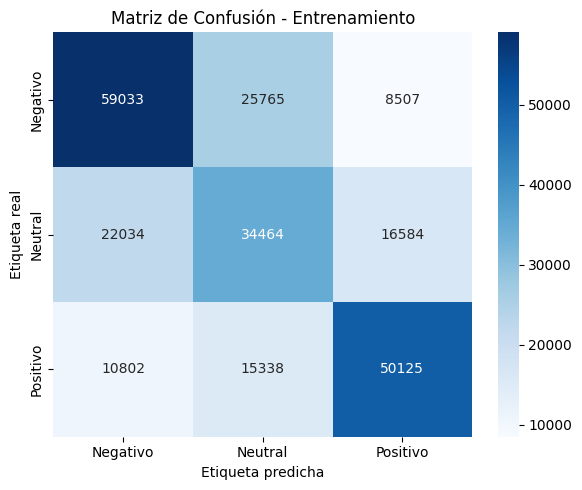

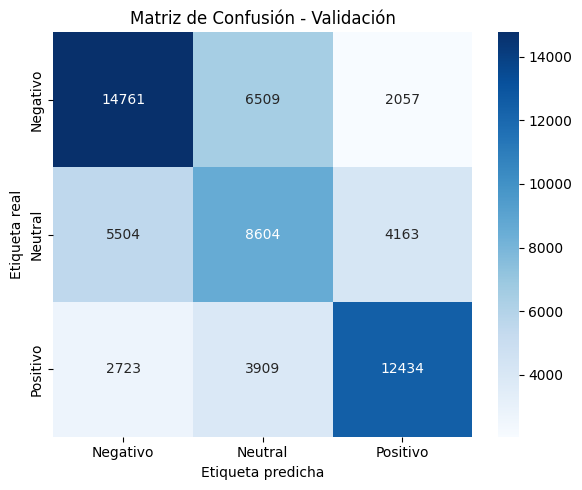

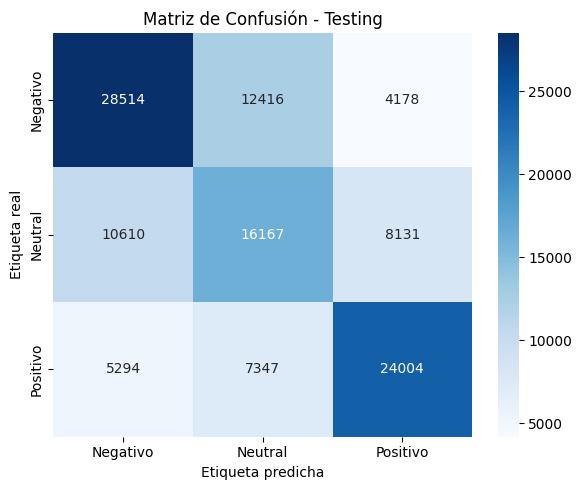

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Generar y guardar las matrices de confusión
plot_conf_matrix(y_train, y_train_pred_labels, "Matriz de Confusión - Entrenamiento", "conf_matrix_train_NaiveBayes.png")
plot_conf_matrix(y_valid, y_valid_pred_labels, "Matriz de Confusión - Validación", "conf_matrix_valid_NaiveBayes.png")
plot_conf_matrix(y_test, y_test_pred_labels, "Matriz de Confusión - Testing", "conf_matrix_test_NaiveBayes.png")

#### Regresión Logística Ridge/Lasso

In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Entrenar con regularización L2 (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear')
start_time = time.time()
logreg_l2.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento ridge: {end_time - start_time:.4f} segundos")
start_time = time.time()
y_pred_l2 = logreg_l2.predict(X_test)
end_time = time.time()
print(f"Tiempo de prediccion redge: {end_time - start_time:.4f} segundos")
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Entrenar con regularización L1 (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
start_time = time.time()
logreg_l1.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento lasso: {end_time - start_time:.4f} segundos")
start_time = time.time()
y_pred_l1 = logreg_l1.predict(X_test)
end_time = time.time()
print(f"Tiempo de prediccion lasso: {end_time - start_time:.4f} segundos")
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# Imprimir resultados
print(f"✅ Precisión con Regularización L2 (Ridge): {accuracy_l2:.4f}")
print(f"✅ Precisión con Regularización L1 (Lasso): {accuracy_l1:.4f}")

Tiempo de entrenamiento ridge: 142.3077 segundos
Tiempo de prediccion redge: 0.8787 segundos
Tiempo de entrenamiento lasso: 384.0457 segundos
Tiempo de prediccion lasso: 0.1626 segundos
✅ Precisión con Regularización L2 (Ridge): 0.7215
✅ Precisión con Regularización L1 (Lasso): 0.7256



##### Ridge/Lasso → Solver optimizado saga.

In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Grilla de hiperparámetros
param_grid = {"alpha": np.logspace(-4, 4, 10)}
# Ridge con Grid Search
ridge = Ridge(solver="saga")
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
start_time = time.time()
ridge_search.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento optimizado ridge: {end_time - start_time:.4f} segundos")

# Definir el modelo y parámetros a probar
lasso = Lasso(max_iter=10000)
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'selection': ['cyclic', 'random']
}

# Búsqueda de hiperparámetros
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
start_time = time.time()
lasso_search.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento optimizado lasso: {end_time - start_time:.4f} segundos")


# Mejores parámetros
print(f"✅ Mejor alpha para Ridge: {ridge_search.best_params_['alpha']}")
print(f"🔹 Mejor R^2 en validación (Ridge): {ridge_search.best_score_:.4f}")
print(f"✅ Mejor alpha para Lasso: {lasso_search.best_params_['alpha']}")
print(f"🔹 Mejor R^2 en validación (Lasso): {lasso_search.best_score_:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de entrenamiento optimizado ridge: 282.4392 segundos
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tiempo de entrenamiento optimizado lasso: 120.6100 segundos
✅ Mejor alpha para Ridge: 0.046415888336127774
🔹 Mejor R^2 en validación (Ridge): 0.5708
✅ Mejor alpha para Lasso: 0.01
🔹 Mejor R^2 en validación (Lasso): -0.0000


In [ ]:
import joblib

# Guardar el mejor modelo Ridge
best_ridge = ridge_search.best_estimator_
joblib.dump(best_ridge, "best_ridge_model.pkl")

# Guardar el mejor modelo Lasso
best_lasso = lasso_search.best_estimator_
joblib.dump(best_lasso, "best_lasso_model.pkl")

print("✅ Modelos guardados: best_ridge_model.pkl y best_lasso_model.pkl")

✅ Modelos guardados: best_ridge_model.pkl y best_lasso_model.pkl


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predecir valores (para regresión Ridge y Lasso, los valores son continuos, por lo que los redondeamos)
y_train_pred_ridge = best_ridge.predict(X_train)
y_valid_pred_ridge = best_ridge.predict(X_valid)
y_test_pred_ridge  = best_ridge.predict(X_test)

y_train_pred_lasso = best_lasso.predict(X_train)
y_valid_pred_lasso = best_lasso.predict(X_valid)
y_test_pred_lasso  = best_lasso.predict(X_test)

# Convertir predicciones continuas en etiquetas discretas (por ejemplo, si las clases son binarias 0 y 1)
y_train_pred_ridge_labels = np.round(y_train_pred_ridge).astype(int)
y_valid_pred_ridge_labels = np.round(y_valid_pred_ridge).astype(int)
y_test_pred_ridge_labels  = np.round(y_test_pred_ridge).astype(int)

y_train_pred_lasso_labels = np.round(y_train_pred_lasso).astype(int)
y_valid_pred_lasso_labels = np.round(y_valid_pred_lasso).astype(int)
y_test_pred_lasso_labels  = np.round(y_test_pred_lasso).astype(int)

# Función para evaluar el modelo
def evaluar(y_true, y_pred, nombre="Conjunto"):
    print(f"\n📊 Resultados - {nombre}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")

    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

# Evaluar Ridge
print("\n🔹 Evaluación Ridge")
evaluar(y_train, y_train_pred_ridge_labels, "Entrenamiento Ridge")
evaluar(y_valid, y_valid_pred_ridge_labels, "Validación Ridge")
evaluar(y_test, y_test_pred_ridge_labels, "Testing Ridge")

# Evaluar Lasso
print("\n🔹 Evaluación Lasso")
evaluar(y_train, y_train_pred_lasso_labels, "Entrenamiento Lasso")
evaluar(y_valid, y_valid_pred_lasso_labels, "Validación Lasso")
evaluar(y_test, y_test_pred_lasso_labels, "Testing Lasso")


🔹 Evaluación Ridge

📊 Resultados - Entrenamiento Ridge
Accuracy  : 0.6419
Precision : 0.7292
Recall    : 0.6419
F1-score  : 0.6565
Matriz de confusión:


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[    0     0     0     0     0]
 [  734 54163 37749   659     0]
 [   32 11777 56353  4915     5]
 [    2   737 29793 45238   495]
 [    0     0     0     0     0]]

📊 Resultados - Validación Ridge
Accuracy  : 0.6389
Precision : 0.7297
Recall    : 0.6389
F1-score  : 0.6536
Matriz de confusión:
[[    0     0     0     0     0]
 [  194 13367  9595   171     0]
 [    9  2868 14197  1197     0]
 [    0   176  7538 11195   157]
 [    0     0     0     0     0]]

📊 Resultados - Testing Ridge
Accuracy  : 0.6381
Precision : 0.7284
Recall    : 0.6381
F1-score  : 0.6529
Matriz de confusión:
[[    0     0     0     0     0     0]
 [  364 25774 18600   370     0     0]
 [   16  5578 27010  2303     1     0]
 [    0   392 14332 21661   258     2]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]

🔹 Evaluación Lasso

📊 Resultados - Entrenamiento Lasso
Accuracy  : 0.3012
Precision : 0.0907
Recall    : 0.3012


/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/cams_venv/lib/python3.9/site-packages

F1-score  : 0.1394
Matriz de confusión:
[[    0 93305     0]
 [    0 73082     0]
 [    0 76265     0]]

📊 Resultados - Validación Lasso
Accuracy  : 0.3012
Precision : 0.0907
Recall    : 0.3012
F1-score  : 0.1394
Matriz de confusión:
[[    0 23327     0]
 [    0 18271     0]
 [    0 19066     0]]

📊 Resultados - Testing Lasso
Accuracy  : 0.2992
Precision : 0.0895
Recall    : 0.2992
F1-score  : 0.1378
Matriz de confusión:
[[    0 45108     0]
 [    0 34908     0]
 [    0 36645     0]]


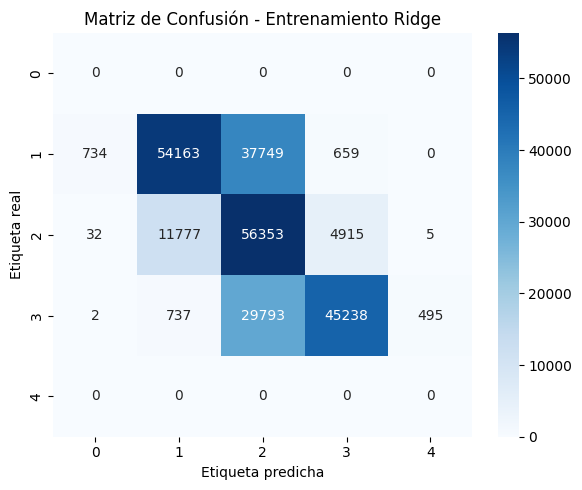

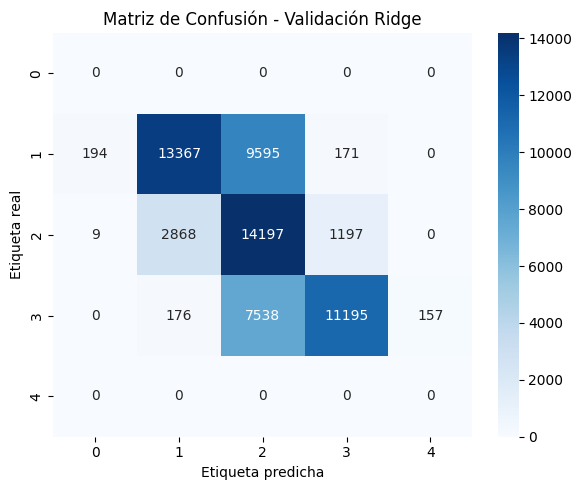

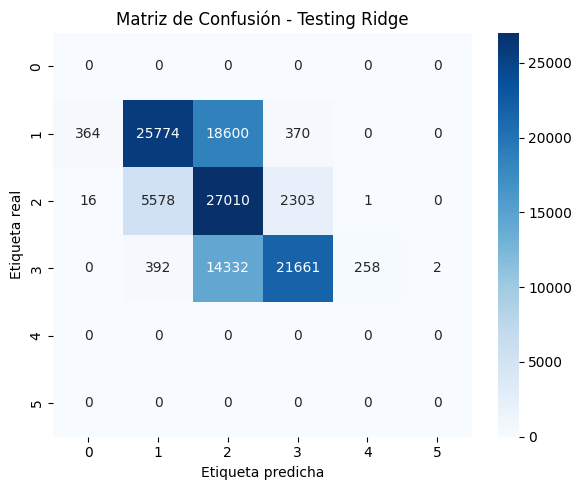

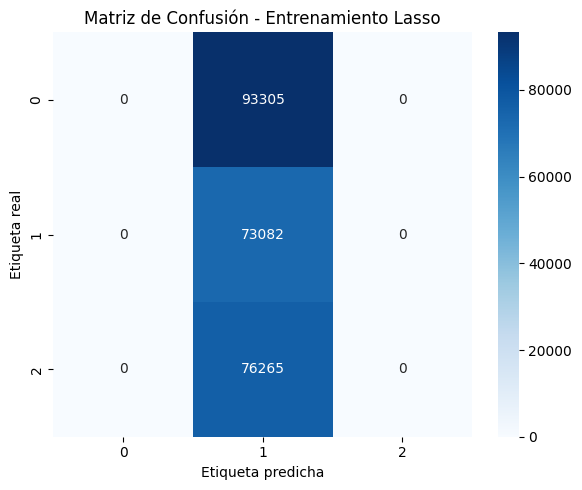

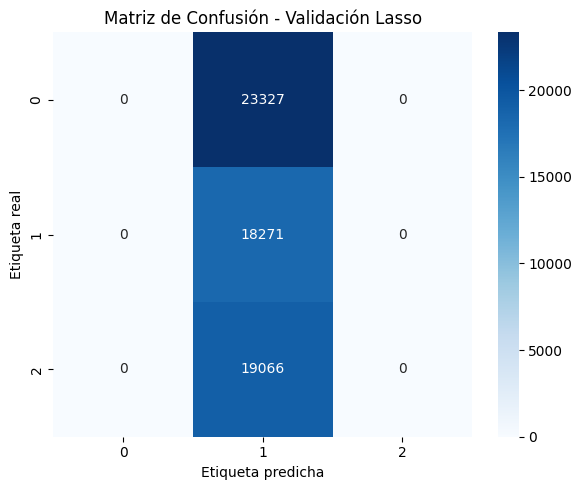

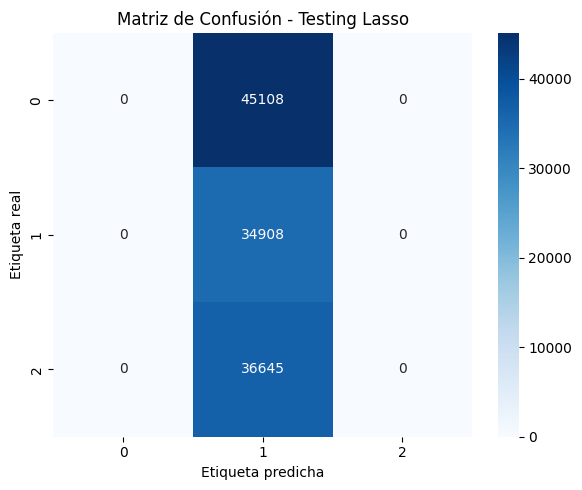

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Generar y guardar las matrices de confusión para Ridge
plot_conf_matrix(y_train, y_train_pred_ridge_labels, "Matriz de Confusión - Entrenamiento Ridge", "conf_matrix_train_Ridge.png")
plot_conf_matrix(y_valid, y_valid_pred_ridge_labels, "Matriz de Confusión - Validación Ridge", "conf_matrix_valid_Ridge.png")
plot_conf_matrix(y_test, y_test_pred_ridge_labels, "Matriz de Confusión - Testing Ridge", "conf_matrix_test_Ridge.png")

# Generar y guardar las matrices de confusión para Lasso
plot_conf_matrix(y_train, y_train_pred_lasso_labels, "Matriz de Confusión - Entrenamiento Lasso", "conf_matrix_train_Lasso.png")
plot_conf_matrix(y_valid, y_valid_pred_lasso_labels, "Matriz de Confusión - Validación Lasso", "conf_matrix_valid_Lasso.png")
plot_conf_matrix(y_test, y_test_pred_lasso_labels, "Matriz de Confusión - Testing Lasso", "conf_matrix_test_Lasso.png")

#### Árbol de Decisión

In [24]:
# Librerias necesarias para el modelo CART
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)
import pandas as pd

In [ ]:
# Definir el modelo base
clf = DecisionTreeClassifier(random_state=42)

# Grilla de hiperparámetros para evitar overfitting
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [10, 20, 50]
}

# Buscar el mejor modelo con validación cruzada solo sobre el entrenamiento
grid_search = GridSearchCV(
    clf,
    param_grid,
    scoring='f1_weighted',  # para clasificación multiclase
    cv=3,
    n_jobs=7
)
grid_search.fit(X_train, y_train)

In [44]:
#Entrenar el modelo con los mejores hiperparámetros
final_tree_model = DecisionTreeClassifier(
    max_depth=10,
    max_leaf_nodes=50,
    min_samples_split=2,     
    min_samples_leaf=1,      
    random_state=42
)

# Ajustar el modelo en todo el set de entrenamiento
final_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=42)

In [45]:
def evaluar_modelo(nombre, modelo, X, y_true):
    # Etiquetas predichas
    y_pred = modelo.predict(X)

    # Probabilidades (necesarias para AUC)
    if hasattr(modelo, "predict_proba"):
        y_probs = modelo.predict_proba(X)
    else:
        y_probs = None

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc = roc_auc_score(y_true, y_probs, multi_class='ovo') if y_probs is not None else None

    # Matriz de confusión
    matriz = confusion_matrix(y_true, y_pred)

    # Imprimir resultados
    print(f"📊 Resultados {nombre}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}" if auc is not None else "AUC       : No disponible")
    print("Matriz de confusión:")
    print(matriz)
    print()

    return y_pred

In [47]:
y_train_pred_labels = evaluar_modelo("Entrenamiento", final_tree_model, X_train, y_train)
y_valid_pred_labels = evaluar_modelo("Validación", final_tree_model, X_valid, y_valid)
y_test_pred_labels = evaluar_modelo("Testing", final_tree_model, X_test, y_test)

📊 Resultados Entrenamiento
Accuracy  : 0.5362
Precision : 0.5133
Recall    : 0.5218
F1-score  : 0.5092
AUC       : 0.7060
Matriz de confusión:
[[63172 14022 16111]
 [29696 18930 24456]
 [15715 12543 48007]]

📊 Resultados Validación
Accuracy  : 0.5308
Precision : 0.5078
Recall    : 0.5163
F1-score  : 0.5039
AUC       : 0.7025
Matriz de confusión:
[[15744  3462  4121]
 [ 7460  4689  6122]
 [ 4028  3268 11770]]

📊 Resultados Testing
Accuracy  : 0.5268
Precision : 0.5029
Recall    : 0.5120
F1-score  : 0.4995
AUC       : 0.6992
Matriz de confusión:
[[29884  6936  8288]
 [14408  8754 11746]
 [ 7703  6118 22824]]



In [49]:
def plot_conf_matrix_arbol(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])

    plt.title(title)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()
    
plot_conf_matrix_arbol(y_train, y_train_pred_labels, "Matriz de Confusión - Árbol Train", "conf_matrix_train_arbol.png")

plot_conf_matrix_arbol(y_test, y_test_pred_labels, "Matriz de Confusión - Árbol Test", "conf_matrix_test_arbol.png")

#### Random Forest (RF)

In [25]:
# Librerias para realizar Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

In [ ]:
# Configuración de GridSearchCV, creación y entrenamiento del modelo RF
# 🔧 Hiperparámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

# 🌲 Modelo base
rf_clf = RandomForestClassifier(random_state=42)

# 🧠 GridSearchCV con 6 núcleos
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=6,
    verbose=1
)

# 🔁 Entrenar solo con train
grid_search_rf.fit(X_train, y_train)

In [ ]:
# Sacando el mejor modelo
# Obtener el mejor modelo
best_rf = grid_search_rf.best_estimator_

# Mostrar los hiperparámetros óptimos
print("Mejor modelo de Random Forest encontrado:")
print(best_rf)

In [ ]:
# Mostrar todos los hiperparámetros
opt_params = ['n_estimators', 'max_depth', 'min_samples_split', 'max_features']
for param in opt_params:
    print(f"{param}: {best_rf.get_params()[param]}")

n_estimators: 100
max_depth: 15
min_samples_split: 5
max_features: sqrt


In [51]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [52]:
y_train_pred_labels = evaluar_modelo("Entrenamiento", rf, X_train, y_train)
y_valid_pred_labels = evaluar_modelo("Validación", rf, X_valid, y_valid)
y_test_pred_labels = evaluar_modelo("Testing", rf, X_test, y_test)

📊 Resultados Entrenamiento
Accuracy  : 0.9833
Precision : 0.9845
Recall    : 0.9822
F1-score  : 0.9833
AUC       : 0.9991
Matriz de confusión:
[[92819    37   449]
 [ 1406 70845   831]
 [ 1253    88 74924]]

📊 Resultados Validación
Accuracy  : 0.9029
Precision : 0.9085
Recall    : 0.8980
F1-score  : 0.9016
AUC       : 0.9778
Matriz de confusión:
[[22381   131   815]
 [ 1392 15558  1321]
 [ 1719   513 16834]]

📊 Resultados Testing
Accuracy  : 0.8625
Precision : 0.8674
Recall    : 0.8622
F1-score  : 0.8636
AUC       : 0.9601
Matriz de confusión:
[[38904  1222  4982]
 [ 2815 29514  2579]
 [ 3539   906 32200]]



In [53]:
plot_conf_matrix_arbol(y_train, y_train_pred_labels, "Confusion Matrix – Train", "conf_matrix_train_RF.png")
plot_conf_matrix_arbol(y_valid, y_valid_pred_labels, "Confusion Matrix – Valid", "conf_matrix_valid_RF.png")
plot_conf_matrix_arbol(y_test,  y_test_pred_labels,  "Confusion Matrix – Test",  "conf_matrix_test_RF.png")

#### Extreme Gradient Boosting (XGBoost)

In [27]:
# Librerias necesarias para entrenar un XGBoost
import numpy as np
import time
from xgboost import XGBClassifier # type: ignore
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

In [ ]:
# Hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5,10],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8]
}

# Modelo base
xgb_clf = XGBClassifier(
    objective='multi:softprob',  # para clasificación multiclase
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=5
)

# Medir tiempo de entrenamiento
start_time = time.time()

# 🧠 GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=4,
    verbose=1
)

# Entrenamiento con solo el set de entrenamiento
grid_search_xgb.fit(X_train, y_train)

# Tiempo total
end_time = time.time()

elapsed_time = end_time - start_time
print(f"\n⏱️ Tiempo de entrenamiento: {elapsed_time:.2f} segundos")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/dannamartinezponzon/miniconda3/envs/ml_venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:09:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dannamartinezponzon/miniconda3/envs/ml_venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:09:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dannamartinezponzon/miniconda3/envs/ml_venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:09:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dannamartinezponzon/miniconda3/envs/ml_venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:09:50] WARNING: /Users/runner/work/xgboost/xgboost/src/lea


⏱️ Tiempo de entrenamiento: 45312.86 segundos


In [ ]:
# Mostrar los mejores hiperparámetros encontrados por GridSearchCV
print(" Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

# Mostrar el mejor score obtenido (en validación cruzada)
print(f"\nMejor F1-Score (ponderado): {grid_search_xgb.best_score_:.4f}")

🎯 Mejores hiperparámetros encontrados:
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

⭐ Mejor F1-Score (ponderado): 0.8880


In [ ]:
import joblib
# Guardar el mejor modelo 
joblib.dump(grid_search_xgb.best_estimator_, 'best_model_XGBoost.h5')

['best_model_XGBoost.h5']

In [56]:
import joblib

# Cargar el modelo desde el archivo
best_model_XGBoost = joblib.load('best_model_XGBoost.h5')

In [57]:
y_train_pred_labels = evaluar_modelo("Entrenamiento", best_model_XGBoost, X_train, y_train)
y_valid_pred_labels = evaluar_modelo("Validación", best_model_XGBoost, X_valid, y_valid)
y_test_pred_labels = evaluar_modelo("Testing", best_model_XGBoost, X_test, y_test)

📊 Resultados Entrenamiento
Accuracy  : 0.9996
Precision : 0.9997
Recall    : 0.9996
F1-score  : 0.9996
AUC       : 1.0000
Matriz de confusión:
[[93292     6     7]
 [   21 73042    19]
 [   16    16 76233]]

📊 Resultados Validación
Accuracy  : 0.9329
Precision : 0.9332
Recall    : 0.9300
F1-score  : 0.9313
AUC       : 0.9881
Matriz de confusión:
[[22628   314   385]
 [  687 16905   679]
 [ 1017   989 17060]]

📊 Resultados Testing
Accuracy  : 0.8869
Precision : 0.8857
Recall    : 0.8903
F1-score  : 0.8871
AUC       : 0.9751
Matriz de confusión:
[[38356  3118  3634]
 [ 1341 32246  1321]
 [ 1914  1862 32869]]



In [58]:
plot_conf_matrix_arbol(y_train, y_train_pred_labels, "Confusion Matrix – Train", "conf_matrix_train_XGBoost.png")
plot_conf_matrix_arbol(y_valid, y_valid_pred_labels, "Confusion Matrix – Valid", "conf_matrix_valid_XGBoost.png")
plot_conf_matrix_arbol(y_test,  y_test_pred_labels,  "Confusion Matrix – Test",  "conf_matrix_test_XGBoost.png")

#### Máquinas de Soporte Vectorial (SVM)

In [28]:
# Librerías necesarias para el modelo SVM

# Para el modelo SVM
from sklearn.svm import SVC

# Para preprocesamiento
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [ ]:
# Pipeline para el modelo SVM

# Pipeline: Escalamiento + SVM con kernel RBF
pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

# Rejilla de hiperparámetros
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.1],
}

# GridSearch para optimizar hiperparámetros
grid_svm = GridSearchCV(
    pipeline_svm,
    param_grid=param_grid ,
    cv=5,
    scoring="accuracy",
    verbose=2,
    n_jobs=14
)

# Entrenamiento del modelo
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=14,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.001, 0.1]},
             scoring='accuracy', verbose=2)

In [ ]:
# Mostrar resultados 
print("Mejores hiperparámetros:")
print(grid_svm.best_params_)

print("\nMejor Accuracy (CV):")
print(grid_svm.best_score_)

Mejores hiperparámetros:
{'svm__C': 10, 'svm__gamma': 0.001}

Mejor Accuracy (CV):
0.9141486619302471


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import numpy as np

# Evaluación del modelo (sin predict_proba)
def evaluar_modelo(nombre, modelo, X, y_true):
    # Predecir etiquetas directamente
    y_pred = modelo.predict(X)

    # Calcular métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    matriz = confusion_matrix(y_true, y_pred)

    # Mostrar resultados
    print(f"\nResultados – {nombre}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("AUC       : No disponible (el modelo no fue entrenado con probability=True)")
    print("Matriz de confusión:")
    print(matriz)
    
    return y_pred


In [ ]:
# Guardar el mejor modelo en una variable
best_svm = grid_svm.best_estimator_

In [ ]:
y_valid_pred_labels = evaluar_modelo("Validación", best_svm, X_valid, y_valid)
y_test_pred_labels = evaluar_modelo("Testing", best_svm, X_test, y_test)


Resultados – Validación
Accuracy  : 0.9352
Precision : 0.9352
Recall    : 0.9329
F1-score  : 0.9336
AUC       : No disponible (el modelo no fue entrenado con probability=True)
Matriz de confusión:
[[22531   596   200]
 [  721 17035   515]
 [  711  1188 17167]]

Resultados – Testing
Accuracy  : 0.8922
Precision : 0.8928
Recall    : 0.8958
F1-score  : 0.8924
AUC       : No disponible (el modelo no fue entrenado con probability=True)
Matriz de confusión:
[[38522  4864  1722]
 [ 1371 32541   996]
 [ 1328  2290 33027]]


#### Perceptrón Multicapa (MLP)

In [ ]:
# Librerias necesarias
import numpy as np
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Definimos función generadora del modelo
def create_model(neurons=128, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(768,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3 clases
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# KerasClassifier wrapper
model = KerasClassifier(
    model=create_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

# Grid de hiperparámetros
param_grid = {
    'model__neurons': [64, 128, 256],
    'model__dropout_rate': [0.3, 0.4],
    'model__learning_rate': [0.001, 0.0005],
    'batch_size': [64],
    'epochs': [10]
}
# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)

# Ajustar el modelo
grid_result = grid.fit(X_train, y_train)

# Resultados
print("Mejor score (accuracy): {:.4f}".format(grid_result.best_score_))
print("Mejores hiperparámetros:", grid_result.best_params_)

In [ ]:
# Guardando el mejor modelo

# Obtener el mejor modelo ya entrenado
best_model_MLP = grid_result.best_estimator_.model_

# Guardar el modelo
best_model_MLP.save("best_model_MLP.h5")

In [26]:
# Libreria para cargar el modelo
from tensorflow.keras.models import load_model   # type: ignore

In [28]:
# Cargar el modelo guardado
best_model_MLP= load_model("best_model_MLP.h5")

2025-04-10 19:07:16.135160: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-10 19:07:16.135204: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-10 19:07:16.135210: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-10 19:07:16.135253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-10 19:07:16.135265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
best_model_MLP.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,885 (417.52 KB)

 Trainable params: 106,883 (417.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [29]:
# Predecir probabilidades
y_train_pred = best_model_MLP.predict(X_train)
y_valid_pred = best_model_MLP.predict(X_valid)
y_test_pred  = best_model_MLP.predict(X_test)

# Convertir a etiquetas
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_valid_pred_labels = np.argmax(y_valid_pred, axis=1)
y_test_pred_labels  = np.argmax(y_test_pred, axis=1)

# Función para imprimir solo las métricas importantes
def evaluar(y_true, y_pred, y_proba, nombre="Conjunto"):
    print(f"\nResultados - {nombre}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")
    
    try:
        auc = roc_auc_score(y_true, y_proba, multi_class='ovr')
        print(f"AUC       : {auc:.4f}")
    except:
        print("AUC       : No se pudo calcular")
    
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

# Aplicar a cada conjunto
evaluar(y_train, y_train_pred_labels, y_train_pred, "Entrenamiento")
evaluar(y_valid, y_valid_pred_labels, y_valid_pred, "Validación")
evaluar(y_test,  y_test_pred_labels,  y_test_pred,  "Testing")

 142/7583 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step

2025-04-10 19:07:18.870760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7583/7583 ━━━━━━━━━━━━━━━━━━━━ 6s 826us/step
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 3s 861us/step

Resultados - Entrenamiento
Accuracy  : 0.7129
Precision : 0.7054
Recall    : 0.7129
F1-score  : 0.7071
AUC       : 0.8729
Matriz de confusión:
[[73044 15108  5153]
 [21785 36700 14597]
 [ 3888  9126 63251]]

Resultados - Validación
Accuracy  : 0.7134
Precision : 0.7064
Recall    : 0.7134
F1-score  : 0.7082
AUC       : 0.8725
Matriz de confusión:
[[18172  3916  1239]
 [ 5378  9328  3565]
 [ 1028  2262 15776]]

Resultados - Testing
Accuracy  : 0.7110
Precision : 0.7036
Recall    : 0.7110
F1-score  : 0.7054
AUC       : 0.8709
Matriz de confusión:
[[35118  7402  2588]
 [10418 17527  6963]
 [ 1962  4386 30297]]


In [ ]:
# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Generar y guardar las matrices de confusión

# Training
plot_conf_matrix(y_train, y_train_pred_labels, "Matriz de Confusión - Entrenamiento", "conf_matrix_train_MLP.png")

# Validación
plot_conf_matrix(y_valid, y_valid_pred_labels, "Matriz de Confusión - Validación", "conf_matrix_valid_MLP.png")

# Testing
plot_conf_matrix(y_test, y_test_pred_labels, "Matriz de Confusión - Testing", "conf_matrix_test_MLP.png")

#### Red Neuronal Recurrente (RNN)

In [30]:
# Librerías necesarias para el modelo de RNN
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import SimpleRNN # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

In [ ]:
# Función creadora del modelo
def crear_modelo(units=64, dropout_rate=0.3, learning_rate=0.001, input_dim=768, num_classes=3):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(1, input_dim), return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# Preparar los datos para RNN
# Las RNN esperan una secuencia: (samples, timesteps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_valid_rnn = X_valid.reshape(X_valid.shape[0], 1, X_valid.shape[1])
X_test_rnn  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Definimos los hiperparámetros para el modelo con GridSearchCV
# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Empaquetar el modelo para usarlo en sklearn
modelo_rnn = KerasClassifier(
    model=crear_modelo,
    verbose=0,
    callbacks=[early_stopping],
    model__input_dim=768,
    model__num_classes=3
)

# Hiperparámetros para buscar
param_grid = {
    "model__units": [64, 128],
    "model__dropout_rate": [0.3, 0.5],
    "model__learning_rate": [0.001, 0.0005],
    "epochs": [10],
    "batch_size": [64]
}

# GridSearch
grid_rnn = GridSearchCV(
    estimator=modelo_rnn,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=10  
)

In [ ]:
# Entrenar el modelo
grid_rnn.fit(X_train_rnn, y_train, validation_data=(X_valid_rnn, y_valid))

In [ ]:
# Visualizar los resultados del entrenamiento 

# Mostrar mejor resultado del entrenamiento
print("Mejor score (accuracy):", grid_rnn.best_score_)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_rnn.best_params_)

In [ ]:
# Guardar el mejor modelo

# Extraer el modelo ya entrenado
best_model_rnn = grid_rnn.best_estimator_.model_

# Guardar el modelo
best_model_rnn.save("best_model_RNN.h5")

In [31]:
# Para cargar el modelo
from tensorflow.keras.models import load_model   # type: ignore

best_model_rnn= load_model("best_model_RNN.h5")

In [32]:
best_model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,205 (450.02 KB)

 Trainable params: 115,203 (450.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [33]:
# Evaluación del modelo
def evaluar_modelo(nombre, modelo, X, y_true):
    # Obtener probabilidades y etiquetas predichas
    y_probs = modelo.predict(X)
    y_pred = np.argmax(y_probs, axis=1)

    # Calcular métricas
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec  = recall_score(y_true, y_pred, average='macro')
    f1   = f1_score(y_true, y_pred, average='macro')
    auc  = roc_auc_score(y_true, y_probs, multi_class='ovo')

    # Matriz de confusión
    matriz = confusion_matrix(y_true, y_pred)

    print(f"Resultados – {nombre}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")
    print("Matriz de confusión:")
    print(matriz)
    print()

    return y_pred 

In [36]:
# Aplicar a cada conjunto
y_train_pred_labels = evaluar_modelo("Entrenamiento", best_model_rnn, X_train_rnn, y_train)
y_valid_pred_labels = evaluar_modelo("Validación", best_model_rnn, X_valid_rnn, y_valid)
y_test_pred_labels  = evaluar_modelo("Testing", best_model_rnn, X_test_rnn, y_test)

7583/7583 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Resultados – Entrenamiento
Accuracy  : 0.7258
Precision : 0.7156
Recall    : 0.7165
F1-score  : 0.7123
AUC       : 0.8829
Matriz de confusión:
[[75420 12951  4934]
 [22902 36466 13714]
 [ 4044  8001 64220]]

1896/1896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Resultados – Validación
Accuracy  : 0.7255
Precision : 0.7157
Recall    : 0.7167
F1-score  : 0.7130
AUC       : 0.8818
Matriz de confusión:
[[18744  3359  1224]
 [ 5656  9264  3351]
 [ 1044  2018 16004]]

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Resultados – Testing
Accuracy  : 0.7229
Precision : 0.7121
Recall    : 0.7129
F1-score  : 0.7088
AUC       : 0.8800
Matriz de confusión:
[[36344  6308  2456]
 [11069 17219  6620]
 [ 2022  3850 30773]]



In [35]:
# Graficar y guardar matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()  

# Training
plot_conf_matrix(y_train, y_train_pred_labels, "Confusion Matrix - Train", "conf_matrix_train_RNN.png")

# Validación
plot_conf_matrix(y_valid, y_valid_pred_labels, "Confusion Matrix - Validation", "conf_matrix_valid_RNN.png")

# Testing
plot_conf_matrix(y_test, y_test_pred_labels, "Confusion Matrix - Test", "conf_matrix_test_RNN.png")

#### Long Short-Term Memory (LSTM)

In [32]:
# Librerías necesarias para el modelo de LSTM
from tensorflow.keras.layers import LSTM # type: ignore
from tensorflow.keras.layers import Input # type: ignore

In [38]:
# Preparar los datos para el LSTM 
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid_lstm = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Función para crear el modelo LSTM
num_classes = len(np.unique(y_train)) 

def crear_modelo_lstm(units=64, dropout_rate=0.3, learning_rate=0.001, input_shape=(1, X_train_lstm.shape[2])):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Crear el wrapper del modelo
lstm_model = KerasClassifier(
    model=crear_modelo_lstm,
    verbose=0,
    callbacks=[early_stopping]
)

# Hiperparámetros a optimizar
param_grid = {
    'model__units': [64, 128],
    'model__dropout_rate': [0.2, 0.3],
    'model__learning_rate': [0.001, 0.0005],
    'epochs': [10],
    'batch_size': [64],
}

# Configurar GridSearch 
grid_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=11)

# Entrenar
grid_lstm.fit(X_train_lstm, y_train, validation_data=(X_valid_lstm, y_valid))

In [ ]:
# Ver el mejor resultado y los mejores hiperparámetros
print("Mejor score (accuracy):", grid_lstm.best_score_)
print("Mejores hiperparámetros:", grid_lstm.best_params_)

In [ ]:
# Extraer el mejor modelo ya entrenado
best_model_LSTM= grid_lstm.best_estimator_.model_

# Guardar el modelo
best_model_LSTM.save("best_model_LSTM.h5")

In [39]:
# Para cargar el modelo
best_model_LSTM= load_model("best_model_LSTM.h5")

In [40]:
best_model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,653 (1.75 MB)

 Trainable params: 459,651 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Resultados – train
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Accuracy  : 0.8104
Precision : 0.8111
Recall    : 0.8104
F1-score  : 0.8106
AUC       : 0.9363


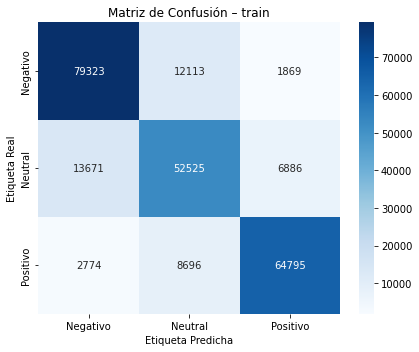


Resultados – valid
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy  : 0.7877
Precision : 0.7889
Recall    : 0.7877
F1-score  : 0.7881
AUC       : 0.9225


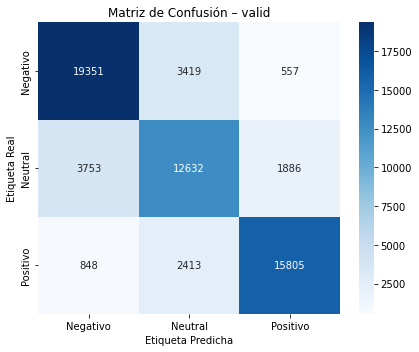


Resultados – test
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy  : 0.7811
Precision : 0.7825
Recall    : 0.7811
F1-score  : 0.7817
AUC       : 0.9174


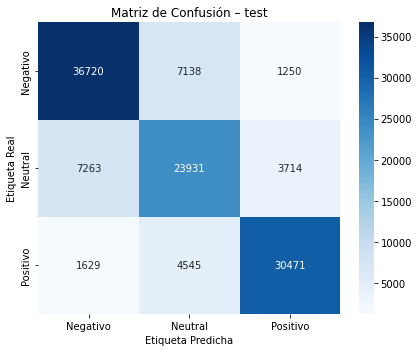

In [41]:
# Función para evaluar y graficar
def evaluar_modelo_lstm(model, X, y_true, conjunto_nombre):
    print(f"\nResultados – {conjunto_nombre}")

    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr')

    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negativo", "Neutral", "Positivo"],
                yticklabels=["Negativo", "Neutral", "Positivo"])
    plt.title(f"Matriz de Confusión – {conjunto_nombre}")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Real")
    plt.tight_layout()

    # Guardar imagen con nombre específico
    nombre_archivo = f"conf_matrix_{conjunto_nombre.lower()}_LSTM.png"
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

# Evaluar en los 3 conjuntos
evaluar_modelo_lstm(best_model_LSTM, X_train_lstm, y_train, "train")
evaluar_modelo_lstm(best_model_LSTM, X_valid_lstm, y_valid, "valid")
evaluar_modelo_lstm(best_model_LSTM, X_test_lstm, y_test, "test")

#### Red Neuronal Convolucional (CNN)

In [33]:
# Librerías necesarias para el modelo de CNN
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten # type: ignore

In [44]:
# Preparar los datos para el modelo CNN
# Preparación para CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_cnn = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_cnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [45]:
X_train_cnn = np.swapaxes(X_train_cnn, 1, 2)
X_valid_cnn = np.swapaxes(X_valid_cnn, 1, 2)
X_test_cnn  = np.swapaxes(X_test_cnn, 1, 2)

In [ ]:
# Definir función del modelo CNN
def crear_modelo_cnn(filters=64, kernel_size=3, dropout_rate=0.3, learning_rate=0.001):
    input_layer = Input(shape=(1, 768))  
    x = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(pool_size=1)(x)
    x = Flatten()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(3, activation='softmax')(x)  # salida para clasificación multiclase

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Envolver para usar con GridSearch
cnn_wrapper = KerasClassifier(
    model=crear_modelo_cnn,
    verbose=0,
    batch_size=64,
    epochs=10
)

# Verifica los parámetros disponibles
print(cnn_wrapper.get_params().keys())

In [ ]:
# Definir la grilla de hiperparámetros
param_grid_cnn = {
    "model__dropout_rate": [0.3, 0.5],
    "model__learning_rate": [0.001, 0.0005],
    "model__filters": [32, 64],
    "epochs": [10],  
}

# Crear el GridSearch
grid_cnn = GridSearchCV(
    estimator=cnn_wrapper,
    param_grid=param_grid_cnn,
    cv=3,  
    verbose=2,
    n_jobs=8  
)

# Entrenamiento del modelo
grid_cnn.fit(X_train_cnn, y_train, validation_data=(X_valid_cnn, y_valid))

In [ ]:
# Mejor score
print(f"Mejor score (accuracy): {grid_cnn.best_score_}")

# Mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_cnn.best_params_}")

In [ ]:
# Guardar el mejor modelo entrenado
best_model_cnn = grid_cnn.best_estimator_.model_

# Guardarlo como archivo 
best_model_cnn.save("best_model_CNN.h5")

In [46]:
# Para cargar el modelo
best_model_CNN= load_model("best_model_CNN.h5")

In [47]:
best_model_CNN.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 768)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 64)          │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,229 (610.27 KB)

 Trainable params: 156,227 (610.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [48]:
# Función para evaluar
def evaluar_modelo(modelo, X, y, conjunto):
    print(f"\nResultados – {conjunto}")

    # Predicciones
    y_pred_probs = modelo.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = y 

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')

    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusión:")
    print(cm)
    return cm

# Evaluar en cada conjunto
cm_train = evaluar_modelo(best_model_CNN, X_train_cnn, y_train, "Entrenamiento")
cm_valid = evaluar_modelo(best_model_CNN, X_valid_cnn, y_valid, "Validación")
cm_test  = evaluar_modelo(best_model_CNN, X_test_cnn,  y_test,  "Testing")


Resultados – Entrenamiento
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Accuracy  : 0.7814
Precision : 0.7841
Recall    : 0.7814
F1-score  : 0.7825
AUC       : 0.9149
Matriz de confusión:
[[74438 16271  2596]
 [13291 51065  8726]
 [ 2480  9686 64099]]

Resultados – Validación
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy  : 0.7665
Precision : 0.7703
Recall    : 0.7665
F1-score  : 0.7680
AUC       : 0.9065
Matriz de confusión:
[[18232  4393   702]
 [ 3458 12537  2276]
 [  732  2602 15732]]

Resultados – Testing
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy  : 0.7624
Precision : 0.7659
Recall    : 0.7624
F1-score  : 0.7638
AUC       : 0.9031
Matriz de confusión:
[[34958  8526  1624]
 [ 6717 23710  4481]
 [ 1365  5007 30273]]


7583/7583 ━━━━━━━━━━━━━━━━━━━━ 7s 940us/step
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step


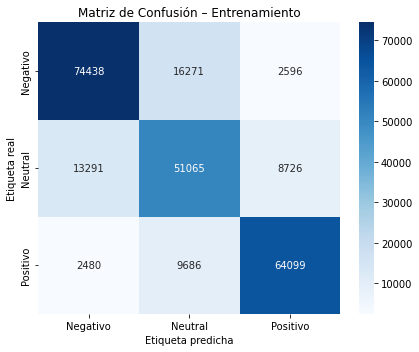

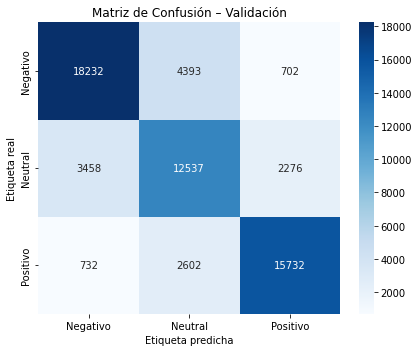

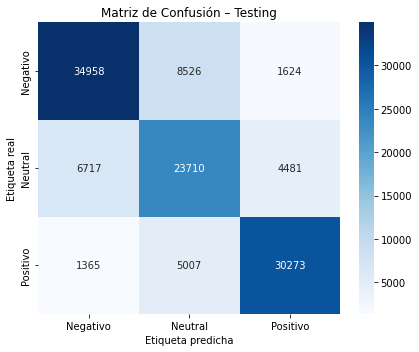

In [57]:
# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()
    
# Predecir etiquetas
y_train_pred_cnn = np.argmax(best_model_CNN.predict(X_train_cnn), axis=1)
y_valid_pred_cnn = np.argmax(best_model_CNN.predict(X_valid_cnn), axis=1)
y_test_pred_cnn  = np.argmax(best_model_CNN.predict(X_test_cnn),  axis=1)
  


# Graficar y guardar las matrices
plot_conf_matrix(y_train, y_train_pred_cnn, "Matriz de Confusión – Entrenamiento", "conf_matrix_train_CNN.png")
plot_conf_matrix(y_valid, y_valid_pred_cnn, "Matriz de Confusión – Validación",   "conf_matrix_valid_CNN.png")
plot_conf_matrix(y_test,  y_test_pred_cnn,  "Matriz de Confusión – Testing",      "conf_matrix_test_CNN.png")

#### Autoencoder (AE)

In [35]:
# Librerías necesarias para el modelo de Autoencoder
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Model # type: ignore

In [ ]:
# Función para crear el modelo
def build_autoencoder(encoding_dim=64, dropout_rate=0.1, learning_rate=0.001):
    input_layer = Input(shape=(768,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    dropout = Dropout(dropout_rate)(encoded)
    decoded = Dense(768, activation='linear')(dropout)
    
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')
    return autoencoder

# Wrapper para usar en GridSearchCV
ae_regressor = KerasRegressor(
    model=build_autoencoder,
    epochs=20,  
    verbose=1
)

# Parámetros para grid search
param_grid = {
    "model__encoding_dim": [16, 32, 64, 128],
    "model__dropout_rate": [0.1, 0.3],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [64]
}

# Grid Search
grid_autoencoder = GridSearchCV(estimator=ae_regressor, param_grid=param_grid, cv=3, n_jobs=10, verbose=2)

# Entrenamiento 
grid_autoencoder.fit(X_train, X_train, validation_data=(X_valid, X_valid)) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


2025-04-04 08:52:33.698739: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-04 08:52:33.700812: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-04 08:52:33.701537: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-04 08:52:33.701814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-04 08:52:33.702277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-04 08:52:33.994643: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-04 08:52:33.996159: I metal_plugin/src/device/metal_device.cc:29

Epoch 1/10


2025-04-04 08:52:36.490289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
Epoch 1/10
Epoch 1/10
   1/2528 ━━━━━━━━━━━━━━━━━━━━ 2:20:12 3s/step - loss: 0.0015

2025-04-04 08:52:38.870115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-04 08:52:39.064472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


  33/2528 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0014 

2025-04-04 08:52:39.136873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 753/2528 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 9.8296e-04Epoch 1/10
 789/2528 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 9.5217e-04Epoch 1/10
 931/2528 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 9.1351e-04

2025-04-04 08:52:46.105450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 975/2528 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 9.0463e-04

2025-04-04 08:52:46.633569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 994/2528 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 9.0090e-04Epoch 1/10
   6/2528 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 0.0015: 8.4051e-

2025-04-04 08:52:47.307319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1064/2528 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 9.1790e-04Epoch 1/10
1124/2528 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 9.0695e-04

2025-04-04 08:52:49.166201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2528/2528 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 6.7200e-04 - val_loss: 4.0588e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 7.2378e-04 - val_loss: 4.0524e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 7.4707e-04 - val_loss: 4.0586e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 6.5670e-04 - val_loss: 2.7765e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 6.6369e-04 - val_loss: 4.0571e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 7.3778e-04 - val_loss: 4.0470e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 6.8495e-04 - val_loss: 4.0547e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 6.4822e-04 - val_loss: 2.7735e-04
Epoch 2/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 4.4472e-04 - val_loss: 4.0260e-04
Epoch 3/10
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 4.4691e-04 - val_loss: 4.0486e-04
Epoch 3/10
2528/2528 ━━━━━━━━━━

2025-04-04 09:10:05.765438: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-04 09:10:05.774894: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-04 09:10:05.774908: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-04 09:10:05.774926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-04 09:10:05.774942: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-04-04 09:10:07.732231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 6.3492e-04 - val_loss: 2.7541e-04
Epoch 2/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2227e-04 - val_loss: 2.7320e-04
Epoch 3/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2120e-04 - val_loss: 2.7269e-04
Epoch 4/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2084e-04 - val_loss: 2.7240e-04
Epoch 5/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2017e-04 - val_loss: 2.7215e-04
Epoch 6/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2008e-04 - val_loss: 2.7213e-04
Epoch 7/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1998e-04 - val_loss: 2.7195e-04
Epoch 8/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1943e-04 - val_loss: 2.7205e-04
Epoch 9/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1980e-04 - val_loss: 2.7184e-04
Epoch 10/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1995e-04 - val_loss: 2.7182e-04


GridSearchCV(cv=3,
             estimator=KerasRegressor(epochs=10, model=<function build_autoencoder at 0x3ea3ac550>),
             n_jobs=8,
             param_grid={'batch_size': [64], 'model__dropout_rate': [0.1, 0.3],
                         'model__encoding_dim': [32, 64],
                         'model__learning_rate': [0.001, 0.0005]},
             verbose=2)

In [35]:
# Mostrar mejores resultados
print(" Mejor score (MSE negativo):", grid_autoencoder.best_score_)
print(" Mejores hiperparámetros:", grid_autoencoder.best_params_)

 Mejor score (MSE negativo): 0.6859081937279295
 Mejores hiperparámetros: {'batch_size': 64, 'model__dropout_rate': 0.1, 'model__encoding_dim': 64, 'model__learning_rate': 0.0005}


In [ ]:
# Construir el mejor modelo basado con los mejores hiperparámetros encontrados

# Mejores hiperparámetros
best_params = grid_autoencoder.best_params_

# Volver a entrenar el mejor modelo
best_autoencoder = build_autoencoder(
    encoding_dim=best_params['model__encoding_dim'],
    dropout_rate=best_params['model__dropout_rate'],
    learning_rate=best_params['model__learning_rate']
)

# Entrenar el modelo final completo con los mejores hiperparámetros
history = best_autoencoder.fit(
    X_train, X_train,
    validation_data=(X_valid, X_valid),
    epochs=10,
    batch_size=best_params['batch_size'],
    verbose=1
)

Epoch 1/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 6.3764e-04 - val_loss: 2.7544e-04
Epoch 2/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2245e-04 - val_loss: 2.7284e-04
Epoch 3/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.2102e-04 - val_loss: 2.7260e-04
Epoch 4/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.2038e-04 - val_loss: 2.7217e-04
Epoch 5/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1993e-04 - val_loss: 2.7214e-04
Epoch 6/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.2031e-04 - val_loss: 2.7206e-04
Epoch 7/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1957e-04 - val_loss: 2.7198e-04
Epoch 8/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.2011e-04 - val_loss: 2.7199e-04
Epoch 9/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 3.1964e-04 - val_loss: 2.7184e-04
Epoch 10/10
3792/3792 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.1964e-04 - val_loss: 2.7171e-04


In [ ]:
# Extraer la capa intermedia en donde estan los nuevos embeddings construidos
encoder_model = Model(
    inputs=best_autoencoder.input,
    outputs=best_autoencoder.get_layer(index=1).output  
)

In [39]:
# Embeddings comprimidos
X_train_encoded = encoder_model.predict(X_train)
X_valid_encoded = encoder_model.predict(X_valid)
X_test_encoded  = encoder_model.predict(X_test)

7583/7583 ━━━━━━━━━━━━━━━━━━━━ 6s 780us/step
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 3s 780us/step


In [40]:
# Guardamos los embeddings comprimidos
np.save("X_train_encoded.npy", X_train_encoded)
np.save("X_valid_encoded.npy", X_valid_encoded)
np.save("X_test_encoded.npy",  X_test_encoded)

In [35]:
# Cargar los datos del Autoencoder
X_train_encoded = np.load("X_train_encoded.npy")
X_valid_encoded = np.load("X_valid_encoded.npy")
X_test_encoded  = np.load("X_test_encoded.npy")

In [36]:
X_train_encoded.shape

(242652, 64)

#### MLP con Autoencoder (AE)

In [ ]:
# Se evaluará el rendimiento del modelo MLP ya realizado pero esta vez con los embeddings comprimidos generados por el Autoencoder

# Definimos función generadora del modelo
def create_model(neurons=128, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(64,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3 clases
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# KerasClassifier wrapper
model = KerasClassifier(
    model=create_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

# Grid de hiperparámetros
param_grid = {
    'model__neurons': [128, 256],
    'model__dropout_rate': [0.3, 0.4],
    'model__learning_rate': [0.001, 0.0005],
    'batch_size': [64],
    'epochs': [10]
}
# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Ajustar el modelo
grid_result = grid.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=128; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=256; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=256; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=256; total time= 4.2min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__neurons=256; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=128; total time=216.5min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=256; total time=126.4min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=256; total time=74.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.001, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=128; total time= 2.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.4, model__learning_rate=0.0005, model__neurons=256; total time= 2.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Resultados
print("Mejor score (accuracy): {:.4f}".format(grid_result.best_score_))
print("Mejores hiperparámetros:", grid_result.best_params_)

Mejor score (accuracy): 0.6374
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.4, 'model__learning_rate': 0.0005, 'model__neurons': 128}


In [46]:
# Extraer el mejor modelo ya entrenado
best_model_MLP_AE = grid_result.best_estimator_.model_

# Guardar el modelo en formato HDF5 (.h5)
best_model_MLP_AE.save("best_model_MLP_AE.h5")

In [52]:
# Para cargar el modelo
best_model_MLP_AE= load_model("best_model_MLP_AE.h5")


Resultados – train
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Accuracy  : 0.6387
Precision : 0.6269
Recall    : 0.6387
F1-score  : 0.6233
AUC       : 0.8068


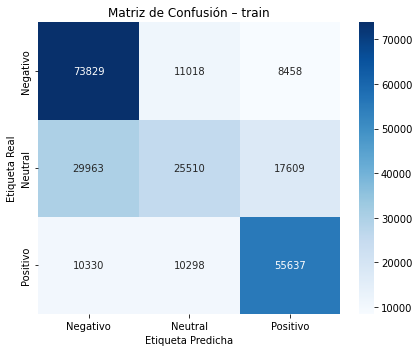


Resultados – valid
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy  : 0.6381
Precision : 0.6268
Recall    : 0.6381
F1-score  : 0.6228
AUC       : 0.8069


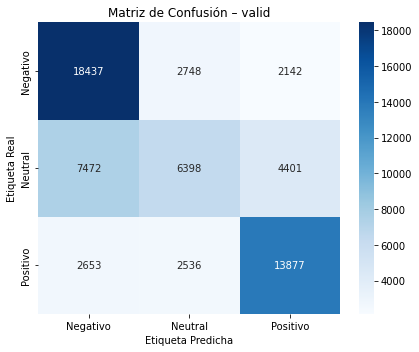


Resultados – test
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy  : 0.6375
Precision : 0.6254
Recall    : 0.6375
F1-score  : 0.6217
AUC       : 0.8051


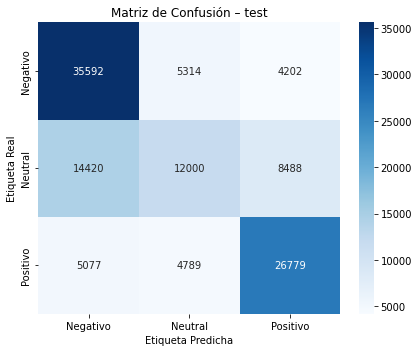

In [53]:
# Evaluar el modelo

# Función para evaluar y graficar
def evaluar_modelo_lstm(model, X, y_true, conjunto_nombre):
    print(f"\nResultados – {conjunto_nombre}")

    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_probs, multi_class='ovr')

    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negativo", "Neutral", "Positivo"],
                yticklabels=["Negativo", "Neutral", "Positivo"])
    plt.title(f"Matriz de Confusión – {conjunto_nombre}")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Real")
    plt.tight_layout()

    # Guardar imagen con nombre específico
    nombre_archivo = f"conf_matrix_{conjunto_nombre.lower()}_MLP_AE.png"
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

# Evaluar en los 3 conjuntos
evaluar_modelo_lstm(best_model_MLP_AE, X_train_encoded, y_train, "train")
evaluar_modelo_lstm(best_model_MLP_AE, X_valid_encoded, y_valid, "valid")
evaluar_modelo_lstm(best_model_MLP_AE, X_test_encoded, y_test, "test")

#### RNN con Autoencoder (AE)

In [30]:
# Función creadora del modelo
def crear_modelo(units=64, dropout_rate=0.3, learning_rate=0.001, input_dim=768, num_classes=3):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(1, input_dim), return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Preparar los datos para RNN
# Las RNN esperan una secuencia: (samples, timesteps, features)
X_train_rnn_encoded = X_train_encoded.reshape(X_train_encoded.shape[0], 1, X_train_encoded.shape[1])
X_valid_rnn_encoded = X_valid_encoded.reshape(X_valid_encoded.shape[0], 1, X_valid_encoded.shape[1])
X_test_rnn_encoded  = X_test_encoded.reshape(X_test_encoded.shape[0], 1, X_test_encoded.shape[1])

In [35]:
# Definimos los hiperparámetros para el modelo con GridSearchCV
# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Empaquetar el modelo para usarlo en sklearn
modelo_rnn = KerasClassifier(
    model=crear_modelo,
    verbose=0,
    callbacks=[early_stopping],
    model__input_dim=64,
    model__num_classes=3
)

# Hiperparámetros para buscar
param_grid = {
    "model__units": [64, 128],
    "model__dropout_rate": [0.3, 0.5],
    "model__learning_rate": [0.001, 0.0005],
    "epochs": [10],
    "batch_size": [64]
}

# GridSearch
grid_rnn = GridSearchCV(
    estimator=modelo_rnn,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=10  
)

# Entrenar el modelo
grid_rnn.fit(X_train_rnn_encoded, y_train, validation_data=(X_valid_rnn_encoded, y_valid))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


2025-04-18 16:29:40.954499: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-18 16:29:40.954572: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-18 16:29:40.954587: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-18 16:29:40.954647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-18 16:29:40.954680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-18 16:29:40.957278: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-18 16:29:40.957309: I metal_plugin/src/device/metal_device.cc:29

[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time= 6.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time= 7.9min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time=10.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time=10.4min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time=10.4min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time=11.7min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time=12.9min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time=13.0min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time=13.0min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time=13.0min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=64; total time= 6.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time= 9.1min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time=10.5min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=128; total time= 6.6min


/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=64; total time= 9.1min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=64; total time=10.2min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.0005, model__units=64; total time= 7.7min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.0005, model__units=64; total time= 9.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.0005, model__units=128; total time= 5.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=128; total time=11.2min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.001, model__units=128; total time=11.2min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.5, model__learning_rate=0.0005, model__units=128; total time= 7.8min


2025-04-18 16:55:16.678400: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-18 16:55:16.678572: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-18 16:55:16.678584: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-18 16:55:16.678601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-18 16:55:16.678610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequen

GridSearchCV(cv=3,
             estimator=KerasClassifier(callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x3ae7832e0>], model=<function crear_modelo at 0x3a7041280>, model__input_dim=64, model__num_classes=3, verbose=0),
             n_jobs=10,
             param_grid={'batch_size': [64], 'epochs': [10],
                         'model__dropout_rate': [0.3, 0.5],
                         'model__learning_rate': [0.001, 0.0005],
                         'model__units': [64, 128]},
             verbose=2)

In [36]:
# Mostrar mejor resultado del entrenamiento
print("Mejor score (accuracy):", grid_rnn.best_score_)
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_rnn.best_params_)

Mejor score (accuracy): 0.6426363681321399
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.5, 'model__learning_rate': 0.0005, 'model__units': 64}


In [37]:
# Guardar el mejor modelo
# Extraer el modelo ya entrenado
best_model_rnn_AE = grid_rnn.best_estimator_.model_
# Guardar el modelo
best_model_rnn_AE.save("best_model_RNN_AE.h5")

In [38]:
# Para cargar el modelo
from tensorflow.keras.models import load_model   # type: ignore
best_model_rnn_AE= load_model("best_model_RNN_AE.h5")

In [39]:
best_model_rnn_AE.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 8,451 (33.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluación del modelo
def evaluar_modelo(nombre, modelo, X, y_true):
    # Obtener probabilidades y etiquetas predichas
    y_probs = modelo.predict(X)
    y_pred = np.argmax(y_probs, axis=1)

    # Calcular métricas
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec  = recall_score(y_true, y_pred, average='macro')
    f1   = f1_score(y_true, y_pred, average='macro')
    auc  = roc_auc_score(y_true, y_probs, multi_class='ovo')

    # Matriz de confusión
    matriz = confusion_matrix(y_true, y_pred)

    print(f"Resultados – {nombre}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")
    print("Matriz de confusión:")
    print(matriz)
    print()

    return y_pred 

In [41]:
# Aplicar a cada conjunto
y_train_pred_labels = evaluar_modelo("Entrenamiento", best_model_rnn_AE, X_train_rnn_encoded, y_train)
y_test_pred_labels  = evaluar_modelo("Testing", best_model_rnn_AE, X_test_rnn_encoded, y_test)

7583/7583 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Resultados – Entrenamiento
Accuracy  : 0.6421
Precision : 0.6269
Recall    : 0.6310
F1-score  : 0.6250
AUC       : 0.8103
Matriz de confusión:
[[69613 14972  8720]
 [25108 29485 18489]
 [ 8365 11200 56700]]

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Resultados – Testing
Accuracy  : 0.6405
Precision : 0.6247
Recall    : 0.6288
F1-score  : 0.6226
AUC       : 0.8085
Matriz de confusión:
[[33506  7282  4320]
 [12118 13889  8901]
 [ 4095  5224 27326]]



In [42]:
# Graficar y guardar matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()  

# Training
plot_conf_matrix(y_train, y_train_pred_labels, "Confusion Matrix - Train", "conf_matrix_train_RNN_AE.png")

# Testing
plot_conf_matrix(y_test, y_test_pred_labels, "Confusion Matrix - Test", "conf_matrix_test_RNN_AE.png")

#### LSTM con Autoencoder (AE)

In [38]:
# Preparar los datos para el LSTM 
X_train_lstm_encoded = X_train_encoded.reshape((X_train_encoded.shape[0], 1, X_train_encoded.shape[1]))
X_valid_lstm_encoded = X_valid_encoded.reshape((X_valid_encoded.shape[0], 1, X_valid_encoded.shape[1]))
X_test_lstm_encoded  = X_test_encoded.reshape((X_test_encoded.shape[0], 1, X_test_encoded.shape[1]))

In [39]:
# Función para crear el modelo LSTM
num_classes = len(np.unique(y_train)) 

def crear_modelo_lstm(units=64, dropout_rate=0.3, learning_rate=0.001, input_shape=(1, X_train_lstm_encoded.shape[2])):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Crear el wrapper del modelo
lstm_model = KerasClassifier(
    model=lambda units, dropout_rate, learning_rate: crear_modelo_lstm(
        units=units,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate,
        input_shape=(1, X_train_lstm_encoded.shape[2])
    ),
    verbose=0,
    callbacks=[early_stopping]
)

# Hiperparámetros a optimizar
param_grid = {
    'model__units': [64, 128],
    'model__dropout_rate': [0.2, 0.3],
    'model__learning_rate': [0.001, 0.0005],
    'epochs': [10],
    'batch_size': [64],
}

# Configurar GridSearch 
grid_lstm = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=10)

# Entrenar
grid_lstm.fit(X_train_lstm_encoded, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


2025-04-19 17:19:45.740703: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-19 17:19:45.740734: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-19 17:19:45.740739: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-19 17:19:45.740757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 17:19:45.740767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-19 17:19:45.741163: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-19 17:19:45.741183: I metal_plugin/src/device/metal_device.cc:29

[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.0005, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.0005, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.0005, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=64; total time= 6.3min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time= 6.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time= 6.5min
[CV

/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: acc

[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time= 6.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time= 6.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=64; total time= 6.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.0005, model__units=128; total time= 6.5min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.0005, model__units=128; total time= 6.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time= 6.5min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time= 6.4min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__units=128; total time= 6.5min
[

/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: acc

[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time= 4.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=64; total time= 4.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time= 4.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time= 4.6min
[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.0005, model__units=128; total time= 4.6min


2025-04-19 17:37:40.126709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.001, model__units=128; total time=20.7min


2025-04-19 17:40:31.580541: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-19 17:40:31.580710: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-19 17:40:31.580729: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-19 17:40:31.580750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 17:40:31.580772: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-19 17:40:31.887892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/miniconda3/envs/ml_ven

GridSearchCV(cv=3,
             estimator=KerasClassifier(callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x3b3d49640>], model=<function <lambda> at 0x3b5ee58b0>, verbose=0),
             n_jobs=10,
             param_grid={'batch_size': [64], 'epochs': [10],
                         'model__dropout_rate': [0.2, 0.3],
                         'model__learning_rate': [0.001, 0.0005],
                         'model__units': [64, 128]},
             verbose=2)

In [43]:
# Mostrar mejor resultado del entrenamiento
print("Mejor score (accuracy):", grid_lstm.best_score_)
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_lstm.best_params_)

Mejor score (accuracy): 0.676095807988395
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 10, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__units': 128}


In [44]:
# Guardar el mejor modelo
# Extraer el modelo ya entrenado
best_model_lstm_AE = grid_lstm.best_estimator_.model_
# Guardar el modelo
best_model_lstm_AE.save("best_model_LSTM_AE.h5")

In [45]:
# Para cargar el modelo
from tensorflow.keras.models import load_model   # type: ignore
best_model_LSTM_AE= load_model("best_model_LSTM_AE.h5")

In [46]:
best_model_LSTM_AE.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,205 (387.52 KB)

 Trainable params: 99,203 (387.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [47]:
# Evaluación del modelo
def evaluar_modelo(nombre, modelo, X, y_true):
    # Obtener probabilidades y etiquetas predichas
    y_probs = modelo.predict(X)
    y_pred = np.argmax(y_probs, axis=1)

    # Calcular métricas
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec  = recall_score(y_true, y_pred, average='macro')
    f1   = f1_score(y_true, y_pred, average='macro')
    auc  = roc_auc_score(y_true, y_probs, multi_class='ovo')

    # Matriz de confusión
    matriz = confusion_matrix(y_true, y_pred)

    print(f"Resultados – {nombre}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"AUC       : {auc:.4f}")
    print("Matriz de confusión:")
    print(matriz)
    print()

    return y_pred 

In [48]:
# Aplicar a cada conjunto
y_train_pred_labels = evaluar_modelo("Entrenamiento", best_model_LSTM_AE, X_train_lstm_encoded, y_train)
y_test_pred_labels  = evaluar_modelo("Testing", best_model_LSTM_AE, X_test_lstm_encoded, y_test)

7583/7583 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Resultados – Entrenamiento
Accuracy  : 0.6873
Precision : 0.6780
Recall    : 0.6769
F1-score  : 0.6754
AUC       : 0.8527
Matriz de confusión:
[[73562 14177  5566]
 [23923 35624 13535]
 [ 6859 11829 57577]]

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Resultados – Testing
Accuracy  : 0.6805
Precision : 0.6704
Recall    : 0.6697
F1-score  : 0.6683
AUC       : 0.8454
Matriz de confusión:
[[35104  7300  2704]
 [11556 16739  6613]
 [ 3391  5715 27539]]



In [49]:
# Graficar y guardar matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negativo', 'Neutral', 'Positivo'],
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    plt.title(title)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()  

# Training
plot_conf_matrix(y_train, y_train_pred_labels, "Confusion Matrix - Train", "conf_matrix_train_LSTM_AE.png")

# Testing
plot_conf_matrix(y_test, y_test_pred_labels, "Confusion Matrix - Test", "conf_matrix_test_LSTM_AE.png")

### Modelo Mejorado

#### Red Bayesiana

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [14]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers, models

# Inicialización de la distribución normal para los pesos
def create_bnn_normal(hidden_units=128, learning_rate=0.001):
    inputs = tf.keras.Input(shape=(768,), dtype=tf.float32)

    # Capa densa con pesos inicializados de manera normal
    x = tf.keras.layers.Dense(hidden_units, activation='relu', 
                              kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.))(inputs)
    x = tf.keras.layers.Dropout(0.3)(x)  # Aplicamos Dropout
    
    x = tf.keras.layers.Dense(hidden_units // 2, activation='relu', 
                              kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.))(x)
    x = tf.keras.layers.Dropout(0.3)(x)  # Aplicamos Dropout

    # Capa de salida
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)  # Output para 3 clases

    # Compilamos el modelo
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [15]:
# Lista de hiperparámetros a probar
hidden_units_list = [64, 128, 256]  # Número de neuronas
learning_rate_list = [0.001, 0.0005, 0.0001]  # Tasa de aprendizaje
dropout_list = [0.3, 0.4, 0.5]  # Tasa de dropout
kl_weight_list = [1e-3, 1e-4, 1e-5]  # Peso de la regularización KL

results = []

# Búsqueda manual de los mejores parámetros
for hu in hidden_units_list:
    for lr in learning_rate_list:
        for do in dropout_list:
            for kl in kl_weight_list:
                print(f"\n🔍 Entrenando con: hidden_units={hu}, learning_rate={lr}, dropout={do}, kl_weight={kl}")
                try:
                    # Creamos el modelo con Dense
                    model = create_bnn_normal(hidden_units=hu, learning_rate=lr)

                    # Ajustar el valor de Dropout
                    model.layers[1].rate = do  # Capa 1 de Dropout
                    model.layers[3].rate = do  # Capa 2 de Dropout

                    # Entrenamos el modelo
                    model.fit(X_tr, y_tr, epochs=10, batch_size=32, verbose=0)

                    # Evaluamos el modelo
                    acc = model.evaluate(X_vl, y_vl, verbose=0)[1]  # accuracy
                    print(f"✅ Accuracy validación: {acc:.4f}")

                    # Guardar los resultados
                    results.append({
                        "hidden_units": hu,
                        "learning_rate": lr,
                        "dropout": do,
                        "kl_weight": kl,
                        "accuracy": acc
                    })

                except Exception as e:
                    print(f"❌ Error: {e}")
                    # Guardamos los errores si algo falla
                    results.append({
                        "hidden_units": hu,
                        "learning_rate": lr,
                        "dropout": do,
                        "kl_weight": kl,
                        "accuracy": None,
                        "error": str(e)
                    })



🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.3, kl_weight=0.001
✅ Accuracy validación: 0.7510

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.3, kl_weight=0.0001
✅ Accuracy validación: 0.7504

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.3, kl_weight=1e-05
✅ Accuracy validación: 0.7512

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.4, kl_weight=0.001
✅ Accuracy validación: 0.7490

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.4, kl_weight=0.0001
✅ Accuracy validación: 0.7491

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.4, kl_weight=1e-05
✅ Accuracy validación: 0.7505

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.5, kl_weight=0.001
✅ Accuracy validación: 0.7494

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.5, kl_weight=0.0001
✅ Accuracy validación: 0.7493

🔍 Entrenando con: hidden_units=64, learning_rate=0.001, dropout=0.5,

In [17]:
import pandas as pd

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results).dropna()  # Eliminamos resultados con None
results_df = results_df.sort_values(by="accuracy", ascending=False)

# Mostramos las mejores combinaciones
print("\n🏆 Mejores combinaciones:")
print(results_df)


🏆 Mejores combinaciones:
    hidden_units  learning_rate  dropout  kl_weight  accuracy
56           256         0.0010      0.3    0.00001  0.786661
54           256         0.0010      0.3    0.00100  0.786364
61           256         0.0010      0.5    0.00010  0.785903
62           256         0.0010      0.5    0.00001  0.785111
58           256         0.0010      0.4    0.00010  0.784089
..           ...            ...      ...        ...       ...
20            64         0.0001      0.3    0.00001  0.686948
19            64         0.0001      0.3    0.00010  0.686799
21            64         0.0001      0.4    0.00100  0.686206
24            64         0.0001      0.5    0.00100  0.686157
25            64         0.0001      0.5    0.00010  0.684376

[81 rows x 5 columns]


In [21]:
def create_dense_model(hidden_units=128, learning_rate=0.001):
    # Convertimos hidden_units a entero (por si acaso es pasado como float)
    hidden_units = int(hidden_units)
    
    inputs = tf.keras.Input(shape=(768,), dtype=tf.float32)

    # Capa densa con inicialización de pesos normal
    x = tf.keras.layers.Dense(hidden_units, activation='relu', 
                              kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.))(inputs)
    x = tf.keras.layers.Dropout(0.3)(x)  # Dropout para regularización
    
    x = tf.keras.layers.Dense(hidden_units // 2, activation='relu', 
                              kernel_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.))(x)
    x = tf.keras.layers.Dropout(0.3)(x)  # Dropout adicional

    # Capa de salida para clasificación multiclase (3 clases)
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Compilamos el modelo
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [22]:
# Recuperar los mejores hiperparámetros
best_params = results_df.iloc[0]
best_hidden_units = best_params['hidden_units']
best_learning_rate = best_params['learning_rate']
best_dropout = best_params['dropout']
best_kl_weight = best_params['kl_weight']

# Crear y entrenar el modelo denso
model_dense = create_dense_model(hidden_units=best_hidden_units, learning_rate=best_learning_rate)

# Ajustar el valor de Dropout
model_dense.layers[1].rate = best_dropout  # Primer Dropout
model_dense.layers[3].rate = best_dropout  # Segundo Dropout

# Entrenamiento
model_dense.fit(X_tr, y_tr, epochs=20, batch_size=32, verbose=1)

# Evaluación
accuracy = model_dense.evaluate(X_vl, y_vl, verbose=1)
print(f"Accuracy con el modelo denso: {accuracy[1]:.4f}")


Epoch 1/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5192 - loss: 1.8626
Epoch 2/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6680 - loss: 0.7411
Epoch 3/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6957 - loss: 0.6890
Epoch 4/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7133 - loss: 0.6585
Epoch 5/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7268 - loss: 0.6302
Epoch 6/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7394 - loss: 0.6061
Epoch 7/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7486 - loss: 0.5854
Epoch 8/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7594 - loss: 0.5653
Epoch 9/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7680 - loss: 0.5487
Epoch 10/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7753 - loss: 0.5359
Epoch 11/20
7583/7583 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7813 - loss: 0.5217
Epoch 12/20
7583/75

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X, y_true):
    # Etiquetas predichas (convertimos probabilidades a clases)
    y_pred_prob = modelo.predict(X)
    y_pred = y_pred_prob.argmax(axis=1)  # Tomamos la clase con mayor probabilidad
    
    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc = None  # AUC no es necesario si no tenemos probabilidades
    
    # Matriz de confusión
    matriz = confusion_matrix(y_true, y_pred)
    
    # Imprimir resultados
    print(f"\n🔍 Resultados {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}" if auc is not None else "AUC: No disponible")
    print("Matriz de confusión:")
    print(matriz)
    print()
    
    return y_pred


In [26]:
# Evaluar el modelo denso con los datos de test
evaluar_modelo("Modelo Denso", model_dense, X_test, y_test)


3646/3646 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step

🔍 Resultados Modelo Denso
Accuracy: 0.8005
Precisión: 0.8176
Recall: 0.8057
F1-score: 0.8029
AUC: No disponible
Matriz de confusión:
[[33718 10142  1248]
 [ 2563 30342  2003]
 [ 1025  6288 29332]]



array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
# Obtener las predicciones del modelo para el conjunto de test
y_pred = model_dense.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convertir probabilidades a clases (predicciones)

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 3s 734us/step


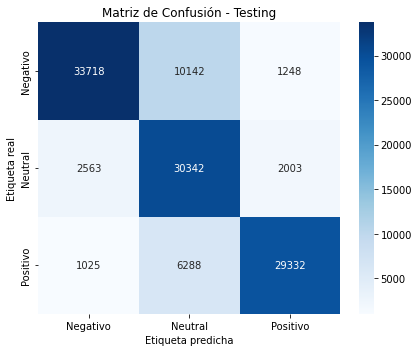

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para graficar y guardar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    
    # Configurar el gráfico
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negativo', 'Neutral', 'Positivo'], 
                yticklabels=['Negativo', 'Neutral', 'Positivo'])
    
    # Títulos y etiquetas
    plt.title(title)
    plt.xlabel("Etiqueta predicha")
    plt.ylabel("Etiqueta real")
    plt.tight_layout()
    
    # Guardar el gráfico como imagen
    plt.savefig(filename, dpi=300)
    plt.show()

# Usar la función para guardar la matriz de confusión del conjunto de validación
plot_conf_matrix(y_test, y_pred, "Matriz de Confusión - Testing", "conf_matrix_test_NB.png")
